In [1]:
from pandas_plink import read_grm
from pandas_plink import get_data_folder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
%matplotlib inline
import umap
import pandas as pd
from sklearn.manifold import *
from sklearn.decomposition import PCA, KernelPCA
import warnings
warnings.filterwarnings('ignore')

/home/bowfan/.local/lib/python3.6/site-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
filepath = '/mnt/d/Project_PhD/Sepsis/spss_gwas2/grm/Caucasians/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno05.Caucasian.grm.bin'
id_filepath = '/mnt/d/Project_PhD/Sepsis/spss_gwas2/grm/Caucasians/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno05.Caucasian.grm.id'
n_snp_filepath = '/mnt/d/Project_PhD/Sepsis/spss_gwas2/grm/Caucasians/SPSS.QC.impute2_plink2.allfiles.king_mind1_maf01_geno05.Caucasian.grm.N.bin'
(K, n_snps) = read_grm(filepath, id_filepath, n_snp_filepath)

df = K.to_pandas()
patientID = np.array(df.index)

In [3]:
phenotypes = pd.read_csv('/mnt/d/Project_PhD/Sepsis/spss_gwas2/grm/phenotypes/sepsis_gwas_v2_matched.csv')

'''for pid in phenotypes['V1']:
    if pid not in patientID:
        idx = phenotypes[phenotypes['V1'] == pid].index
        phenotypes.drop(idx,inplace=True)

phenotypes = phenotypes.sort_values(['V1'])
'''

"for pid in phenotypes['V1']:\n    if pid not in patientID:\n        idx = phenotypes[phenotypes['V1'] == pid].index\n        phenotypes.drop(idx,inplace=True)\n\nphenotypes = phenotypes.sort_values(['V1'])\n"

In [4]:
columns = ['gender', 'age.category2','ethnicity','hosp.dur','picu.dur','outcome.death','pathogen.grp','clin.focus',
           'psofa.score', 'psofa.cvs','psofa.resp','psofa.cns','psofa.ren', 'psofa.hep','psofa.hem',
           'cons05.score','cons05.mods','cons05.cvs','cons05.resp','cons05.cns','cons05.ren', 'cons05.hep','cons05.hem',
           'pelod.score','pelod.cvs','pelod.resp','pelod.cns', 'pelod.ren', 'pelod.hem']

In [5]:
phenotypes = phenotypes[columns]


def get_key(val, dict): 
    for key, value in dict.items(): 
         if val == value: 
            return key 
k = 0
mapping_pathogen = {}       
for pathogen in set(phenotypes['pathogen.grp']):
    mapping_pathogen[pathogen] = k
    k += 1
    
k = 0
mapping_age = {}
for age in set(phenotypes['age.category2']):
    mapping_age[age] = k
    k += 1
    
k = 0
mapping_ethnicity = {}
for ethnicity in set(phenotypes['ethnicity']):
    mapping_ethnicity[ethnicity] = k
    k += 1
    
k = 0
mapping_focus = {}
for focus in set(phenotypes['clin.focus']):
    mapping_focus[focus] = k
    k += 1
    
mapping_binary = {'no':0, 'yes':1}
mapping_gender = {'female':0, 'male':1}


In [6]:
phenotypes = phenotypes.replace(mapping_binary)
phenotypes = phenotypes.replace({'gender':mapping_gender,'age.category2':mapping_age, 'ethnicity':mapping_ethnicity,'clin.focus':mapping_focus, 'pathogen.grp':mapping_pathogen})
phenotypes['picu.dur'] = phenotypes['picu.dur'].fillna(0)
phenotypes = phenotypes.dropna()
phenotypes.shape

(636, 29)

In [7]:
data_raw = np.array(phenotypes)
data = MinMaxScaler().fit_transform(data_raw)

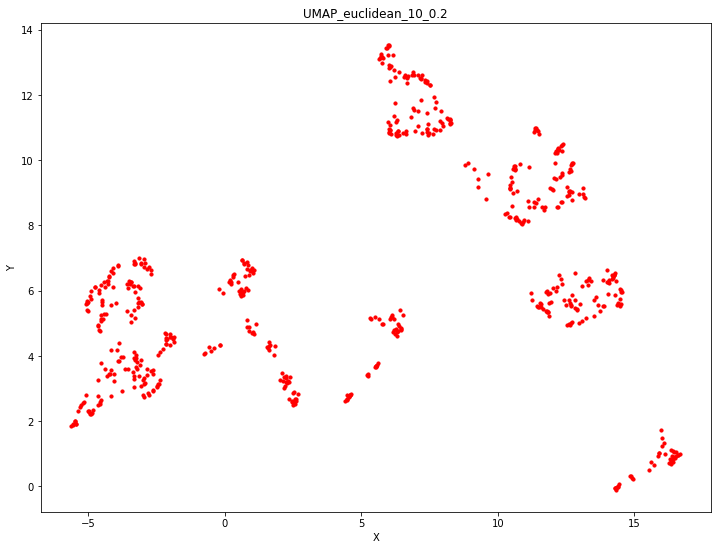

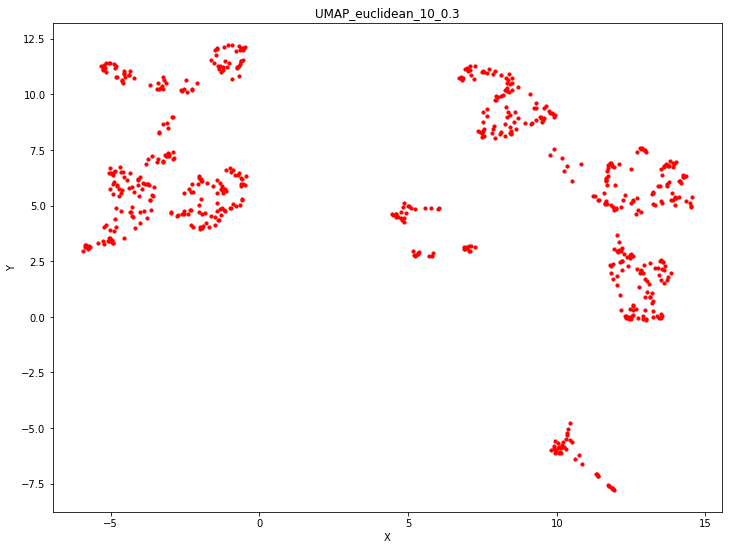

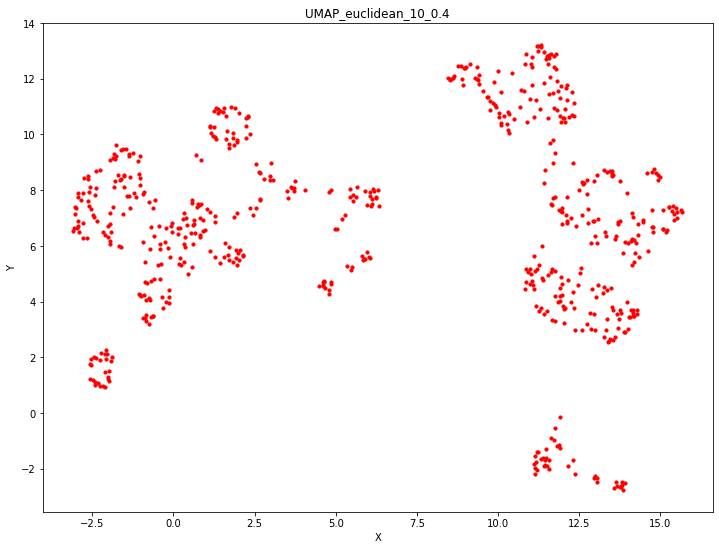

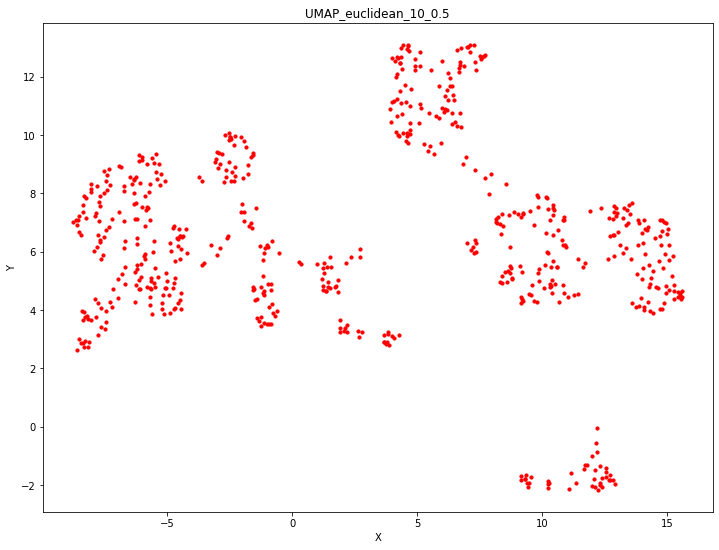

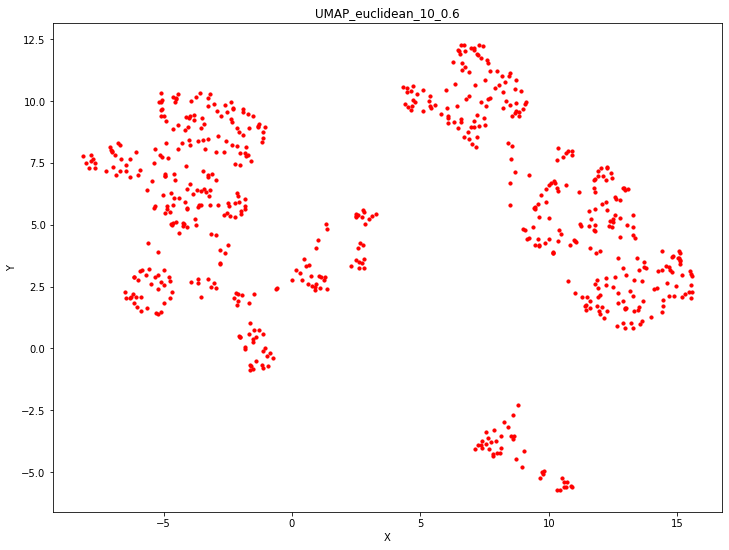

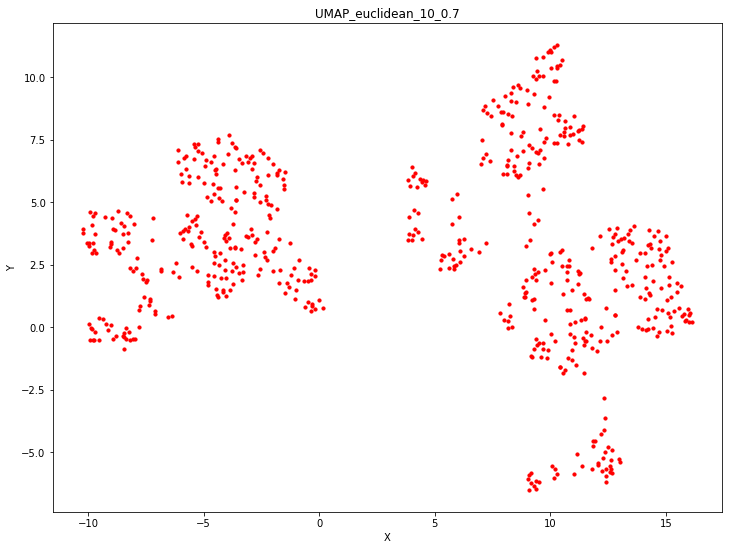

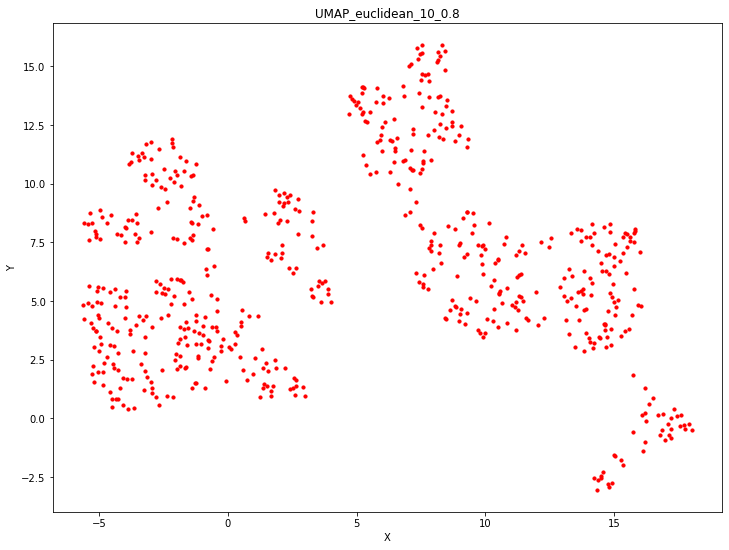

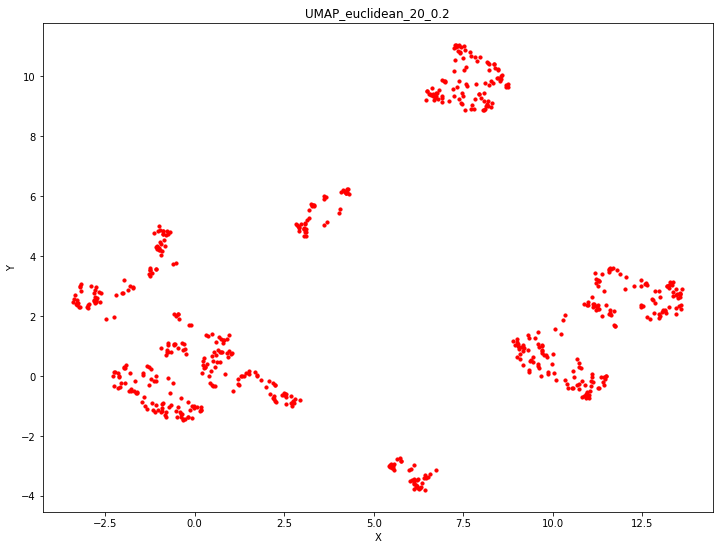

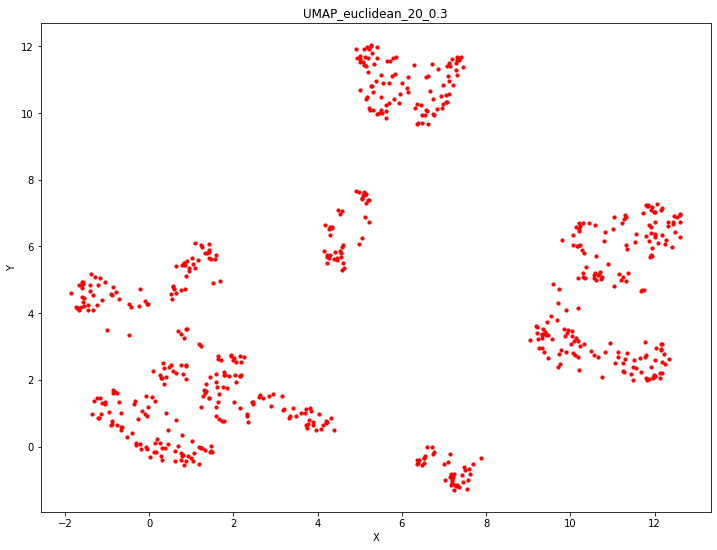

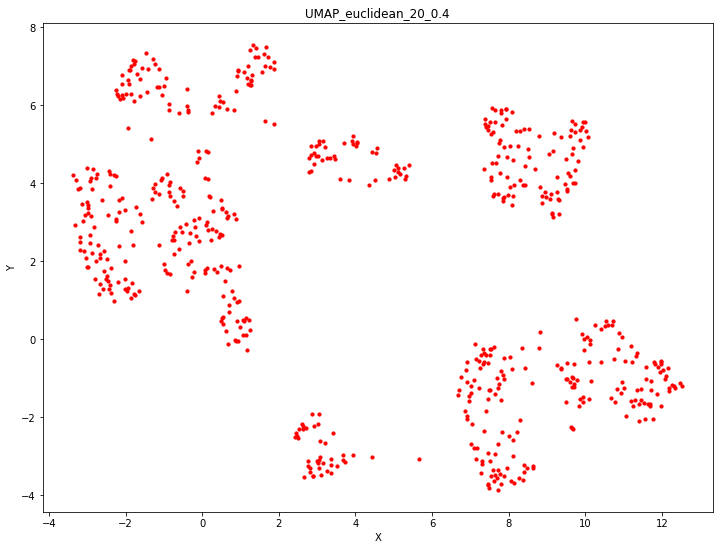

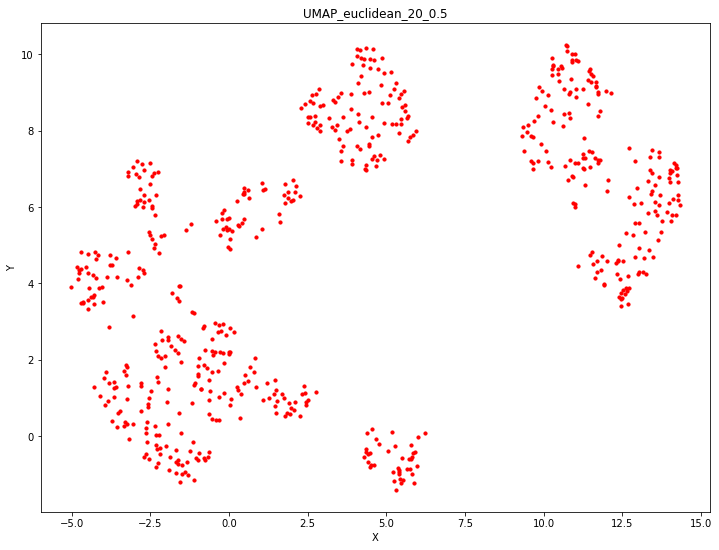

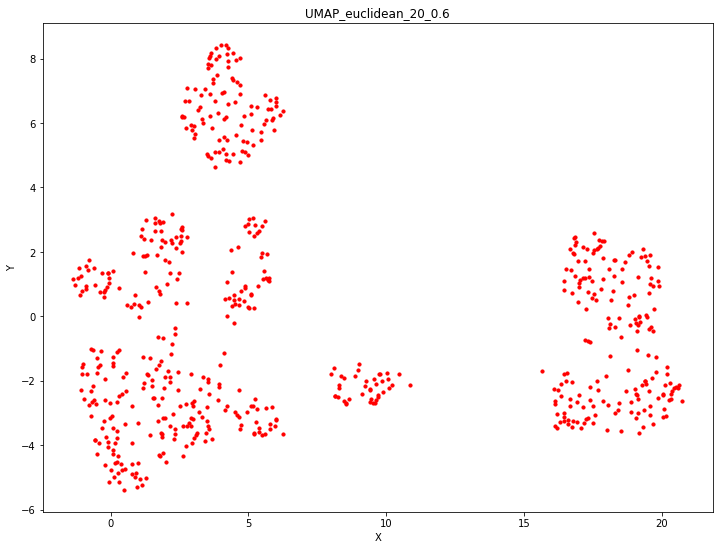

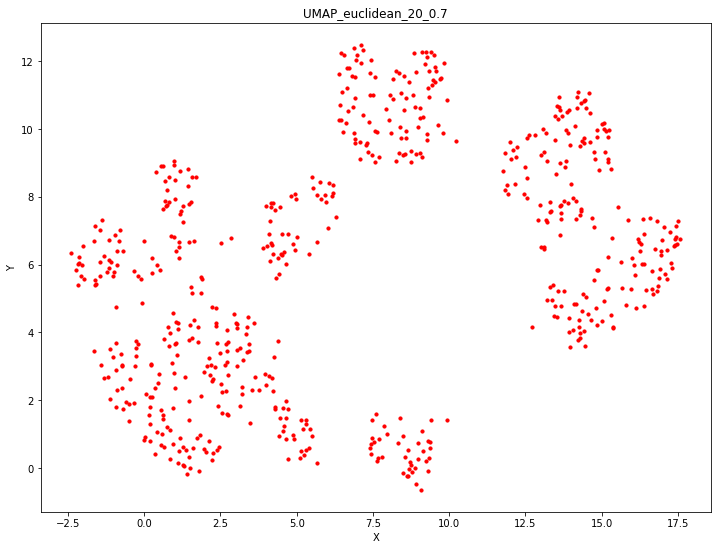

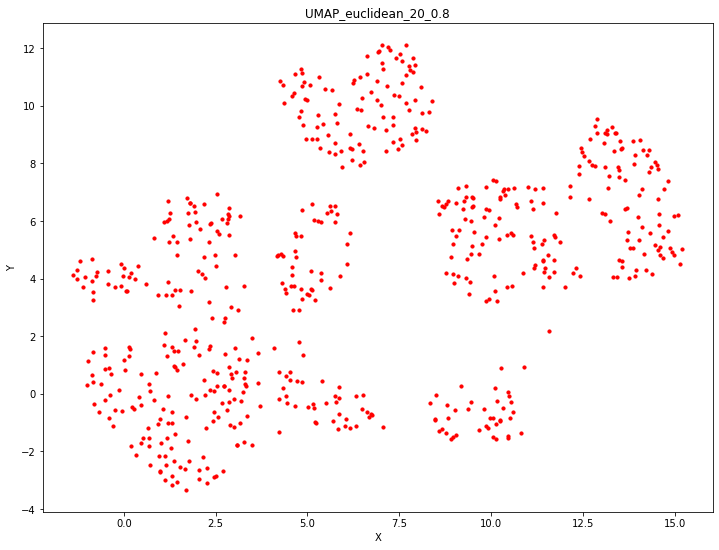

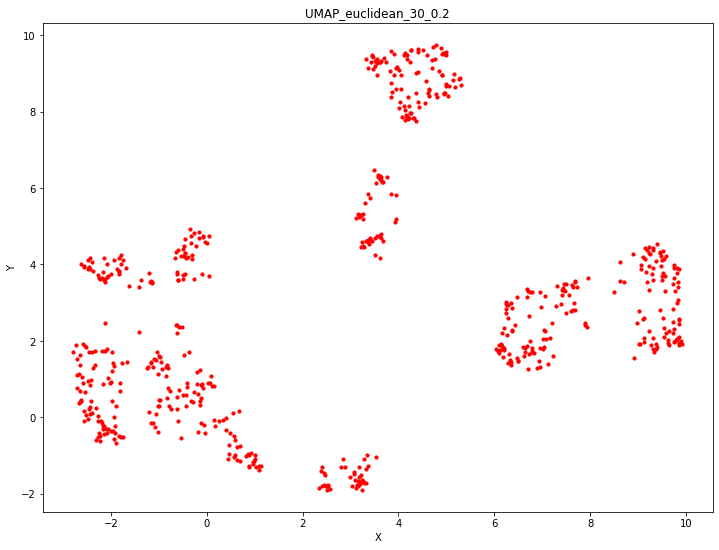

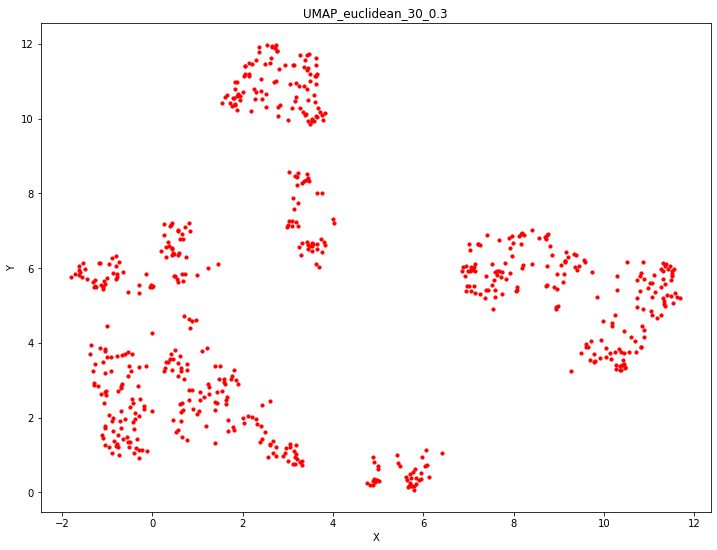

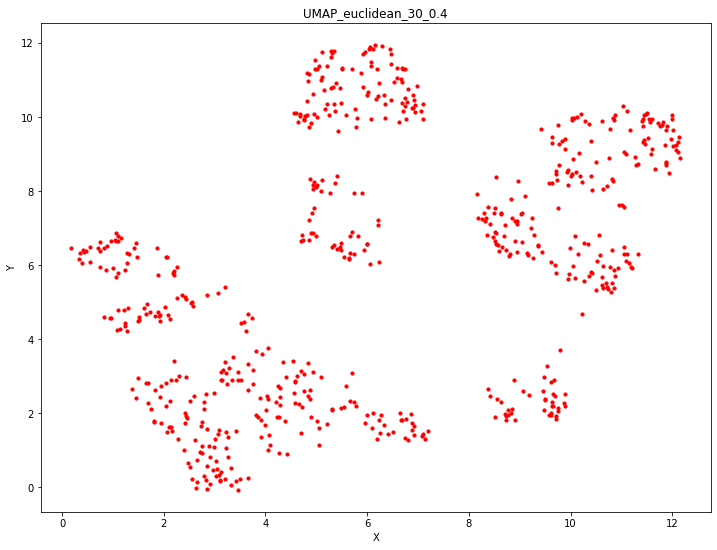

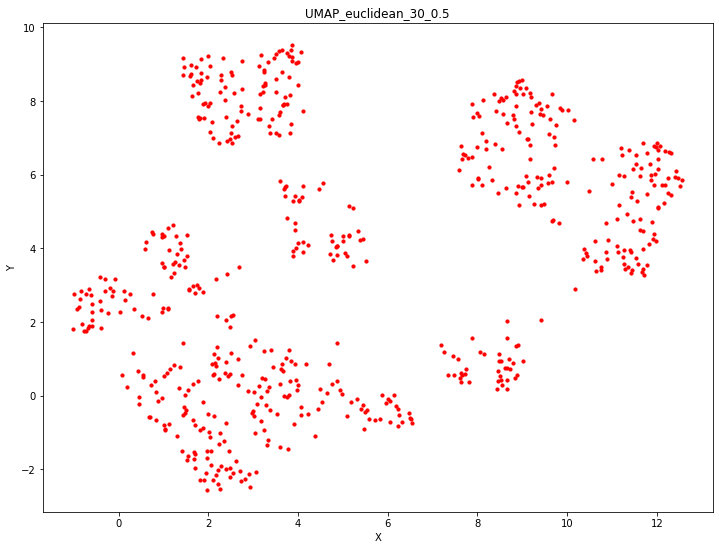

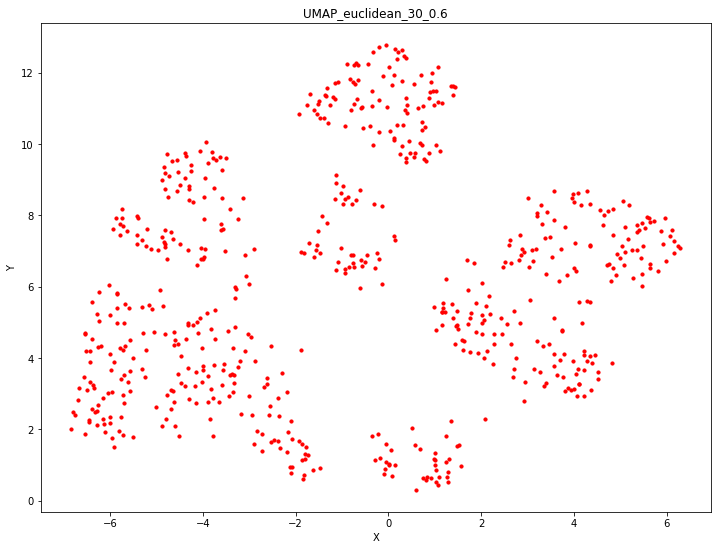

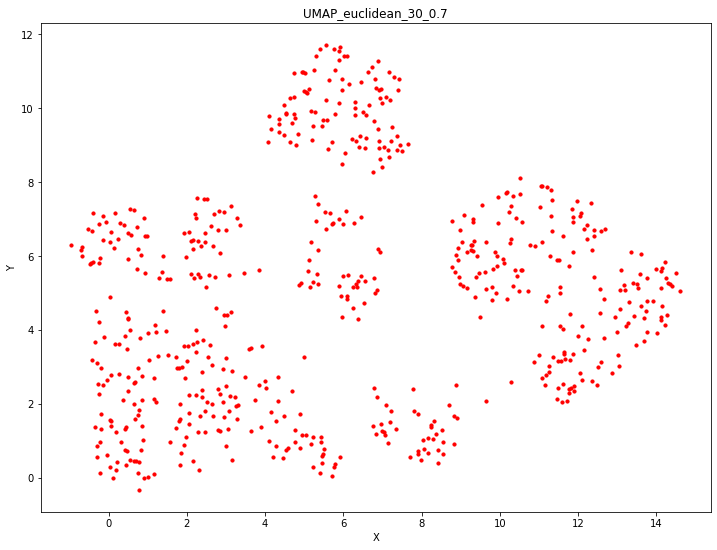

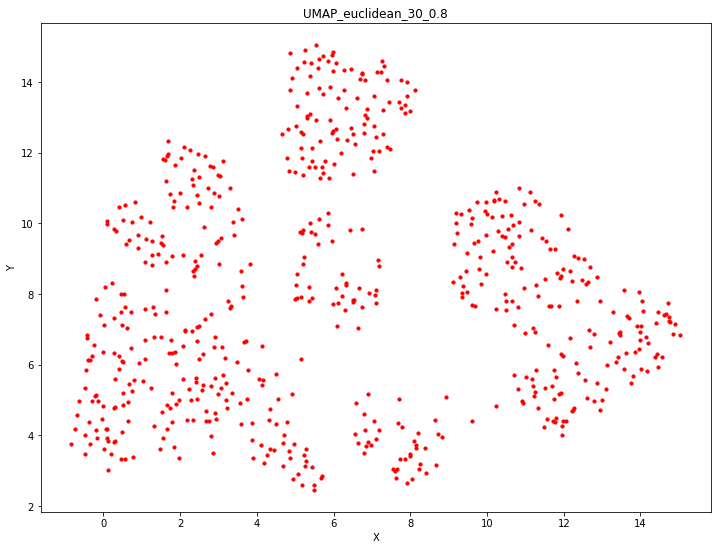

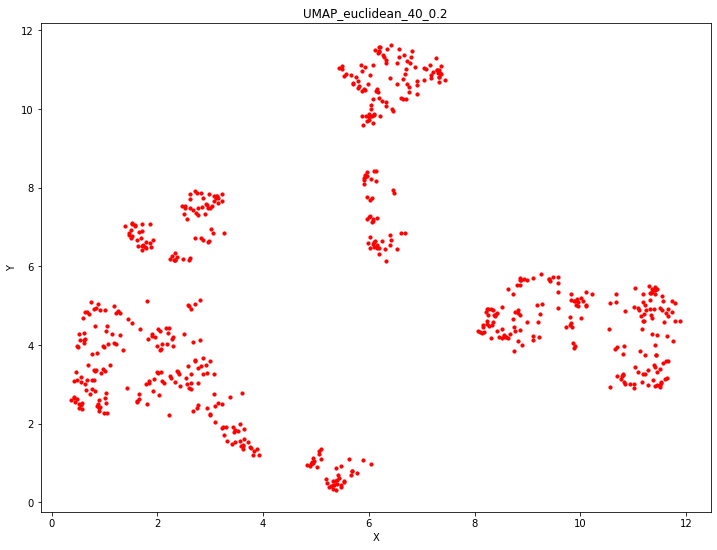

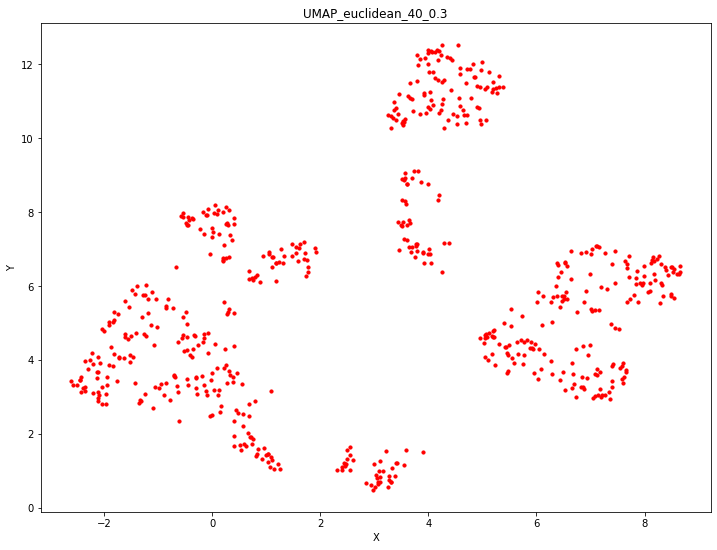

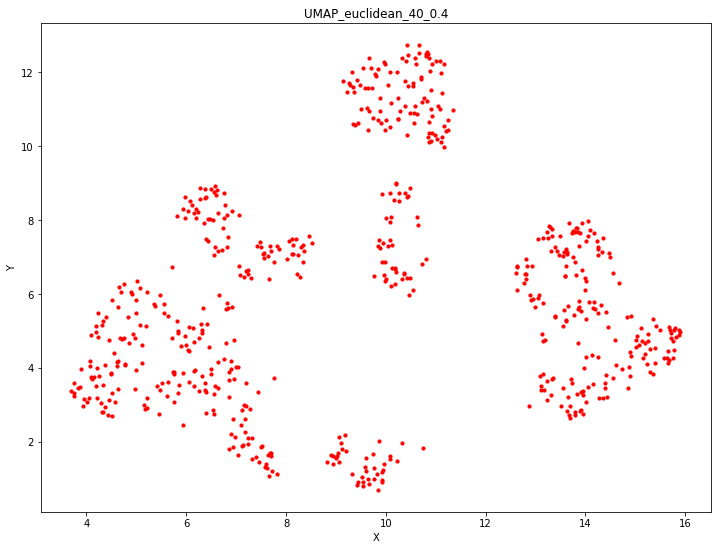

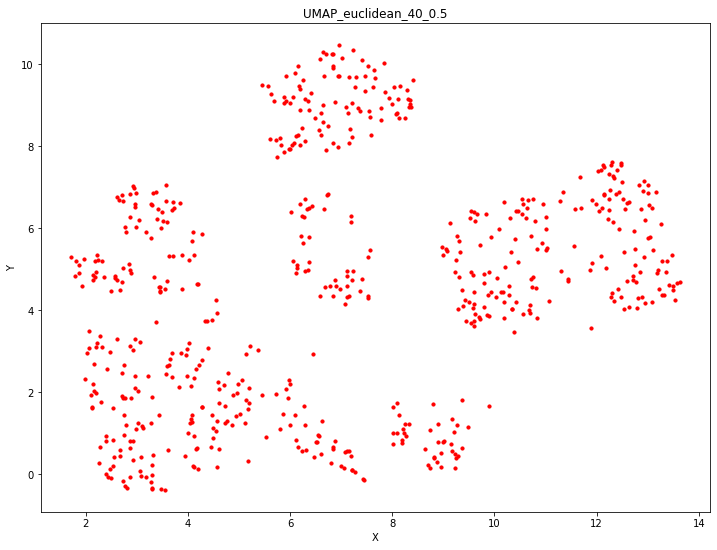

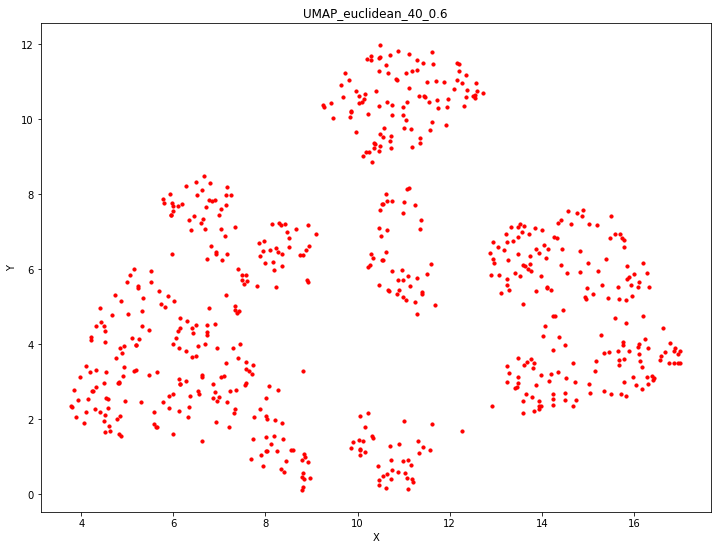

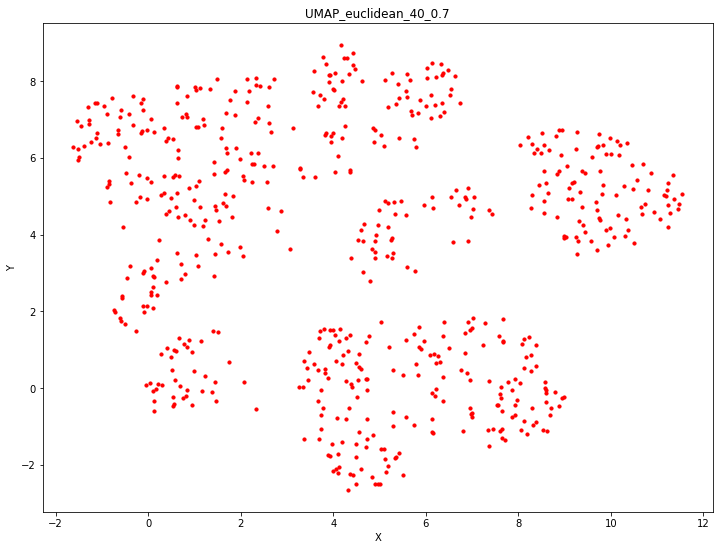

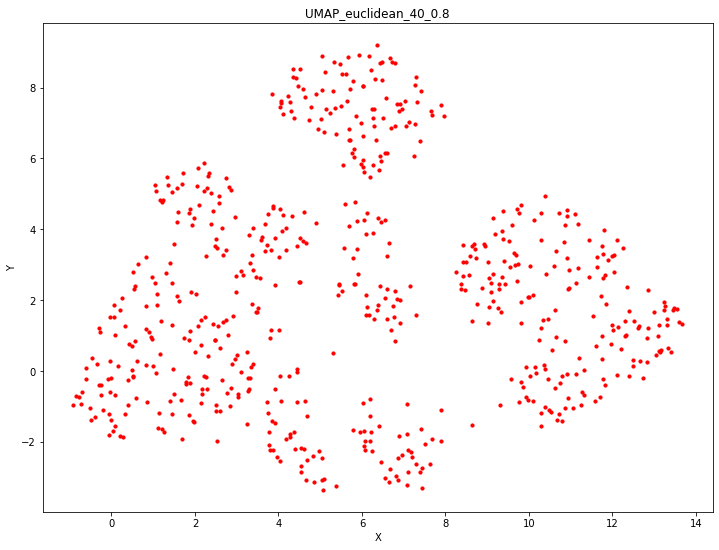

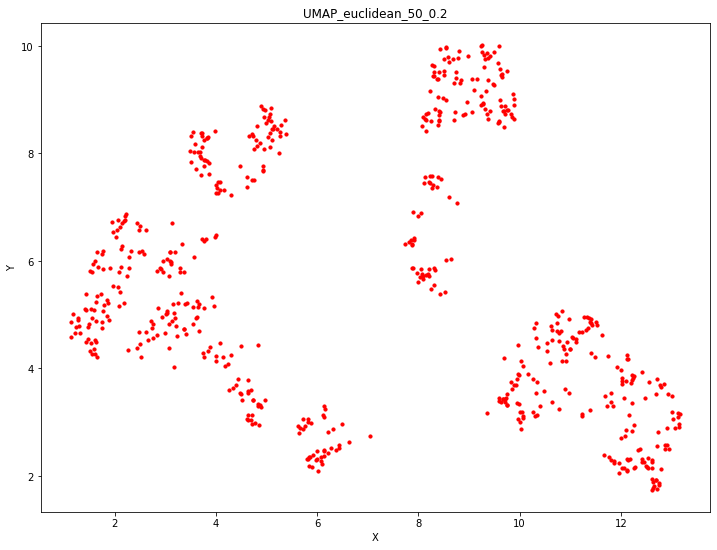

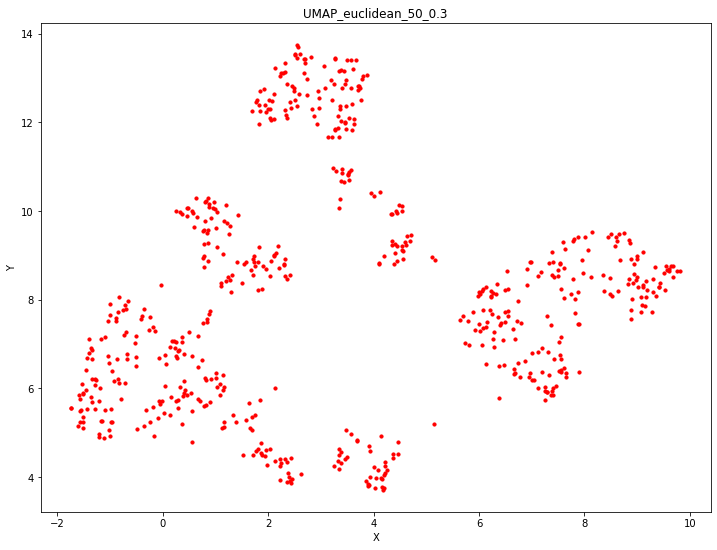

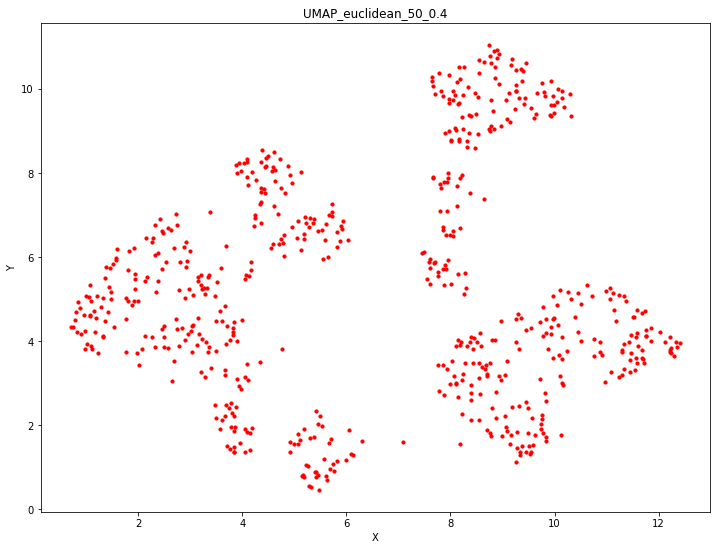

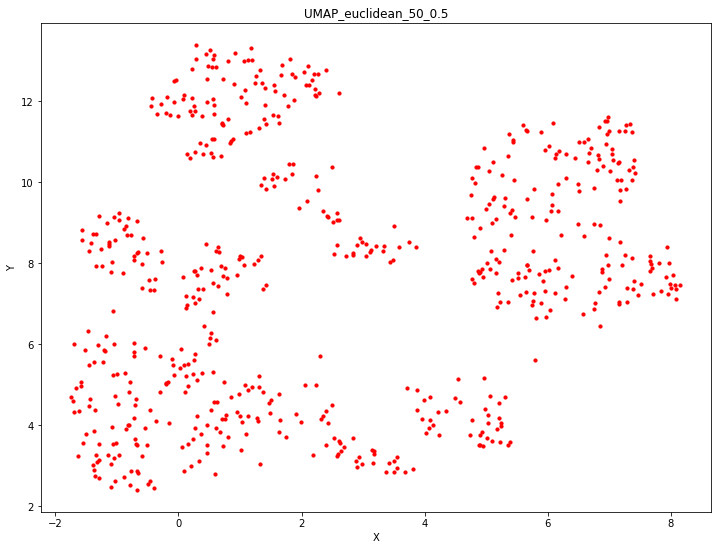

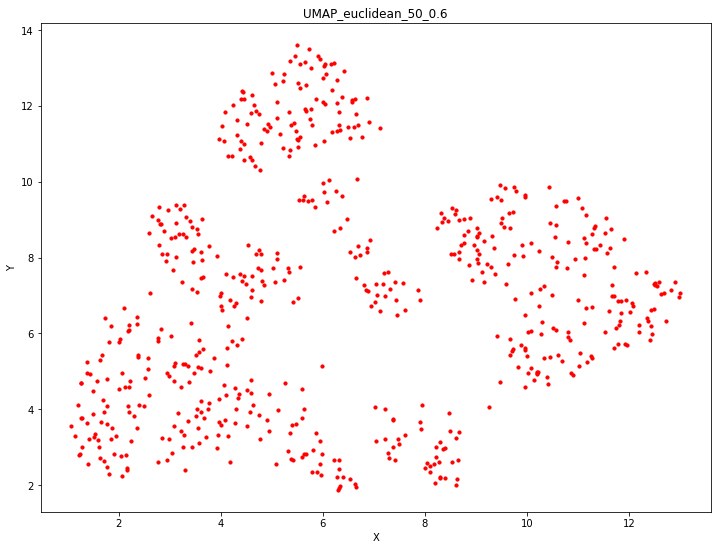

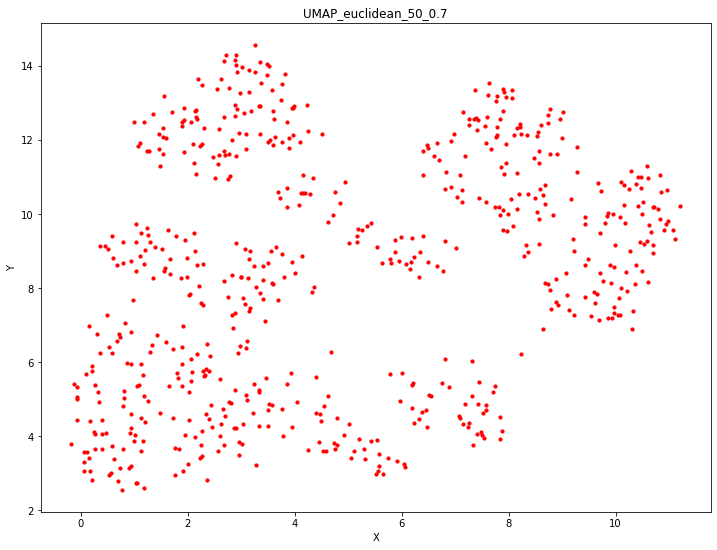

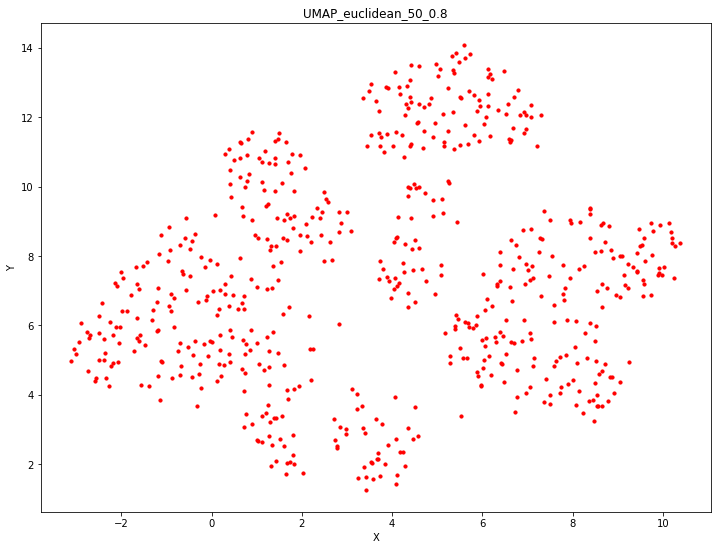

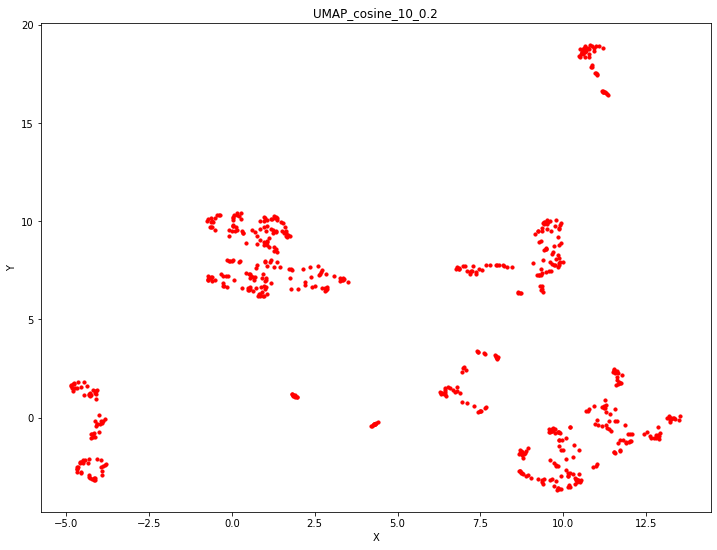

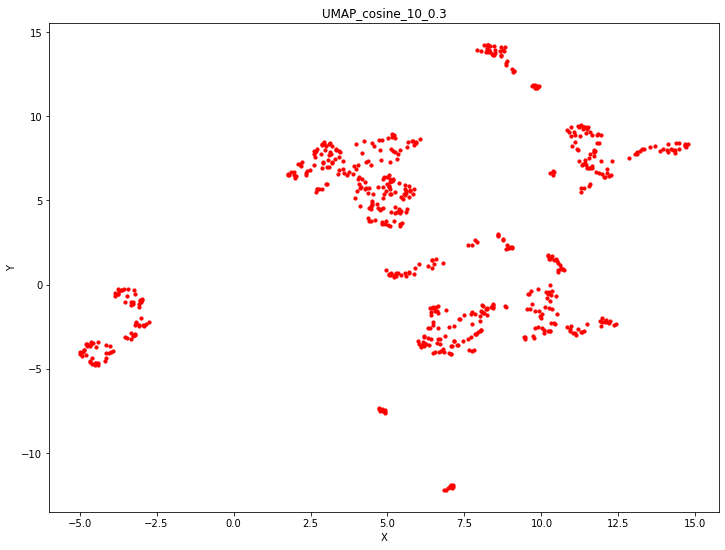

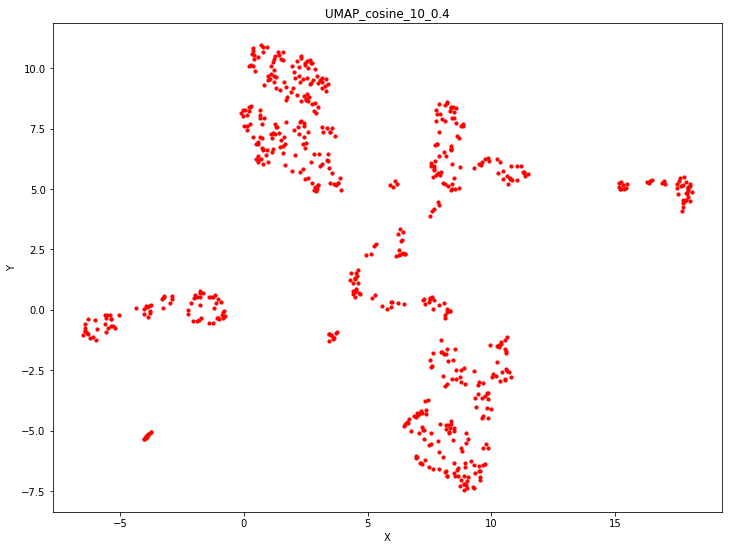

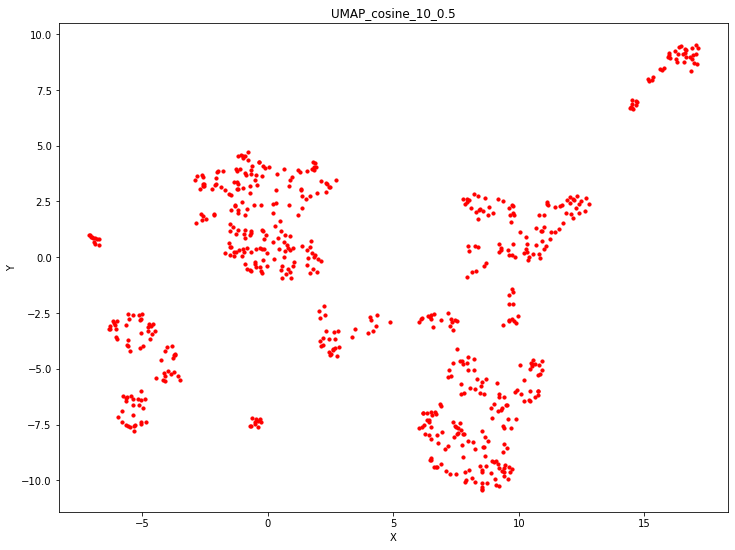

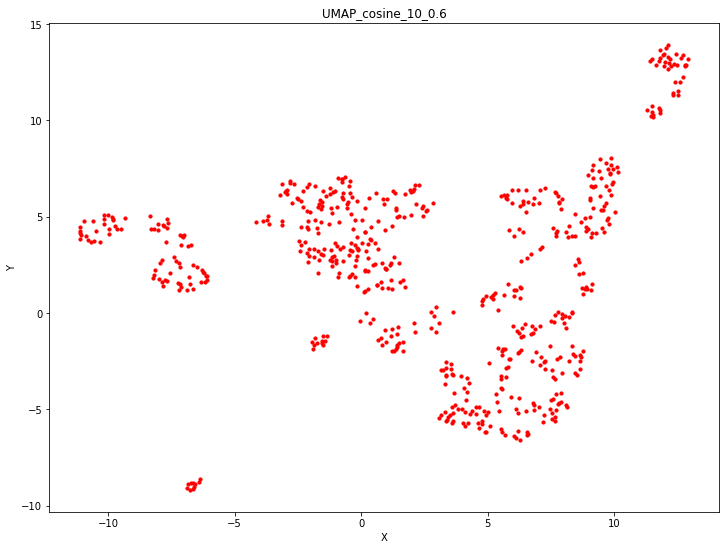

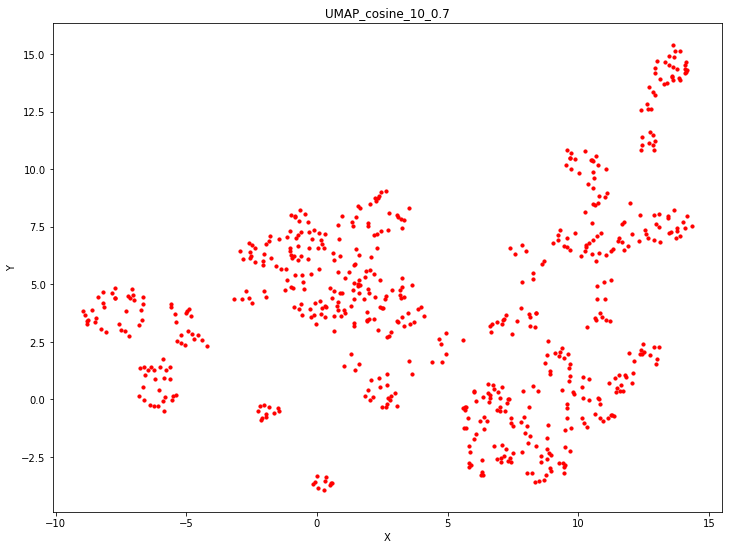

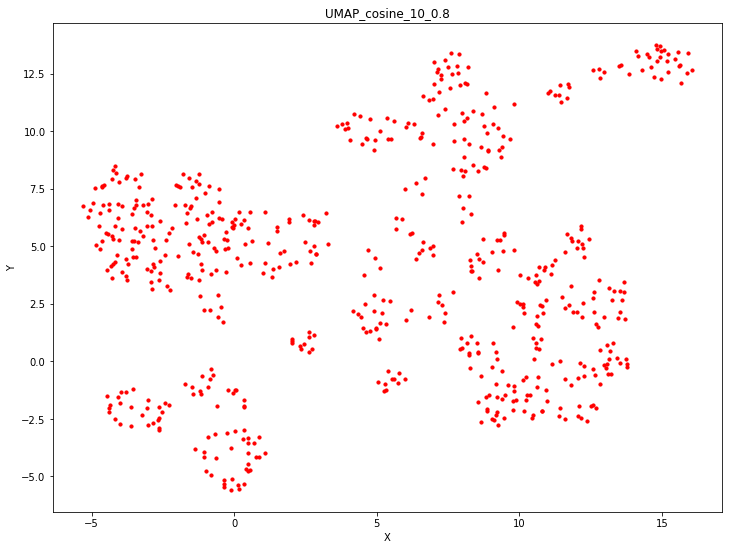

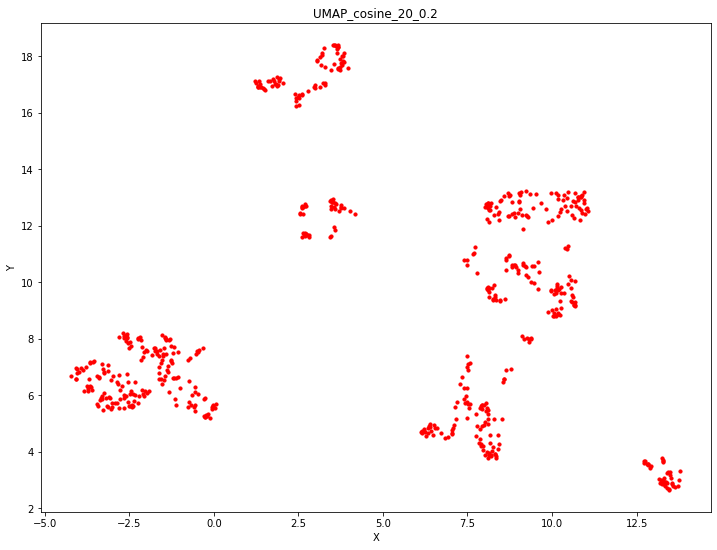

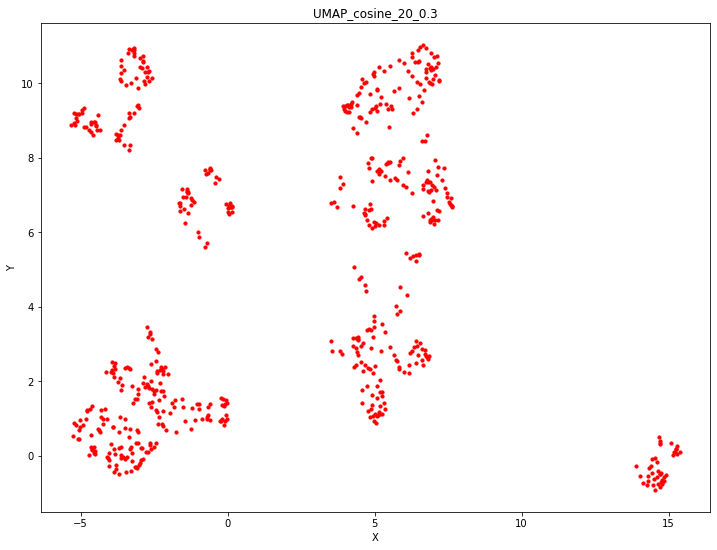

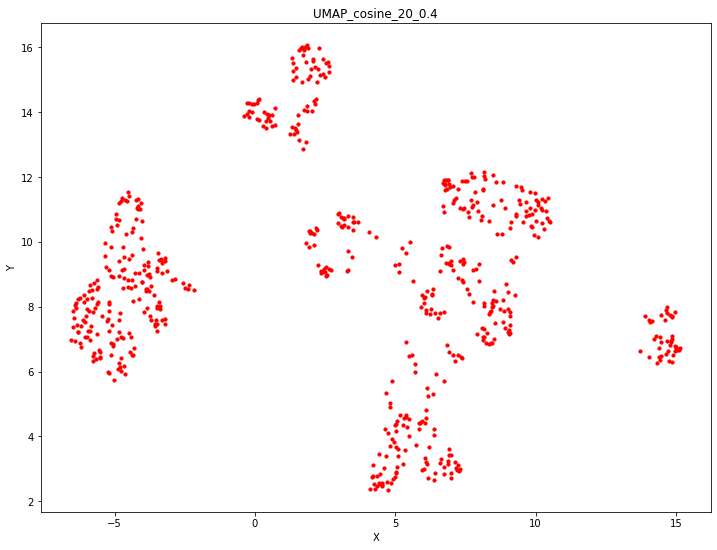

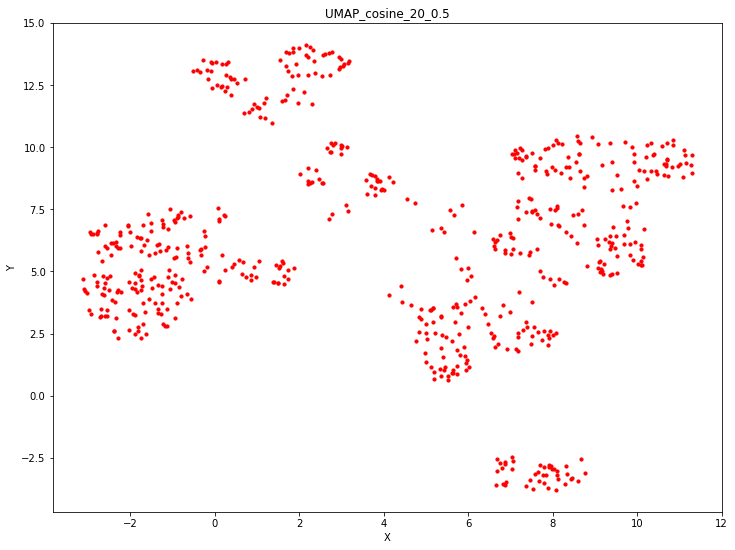

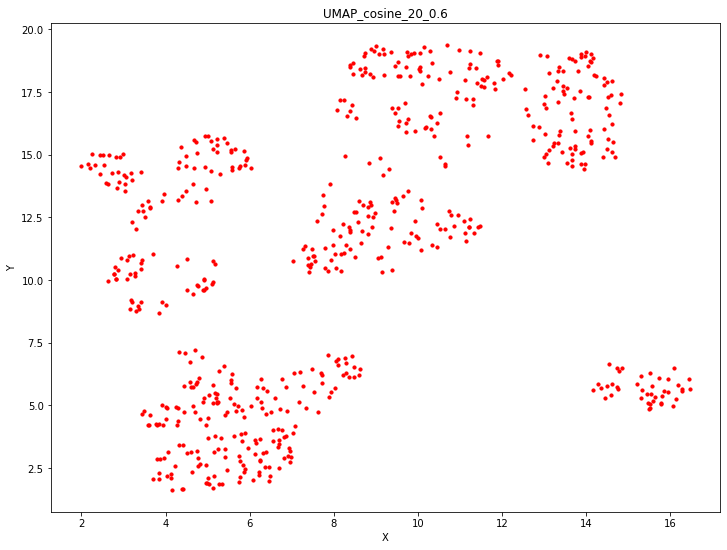

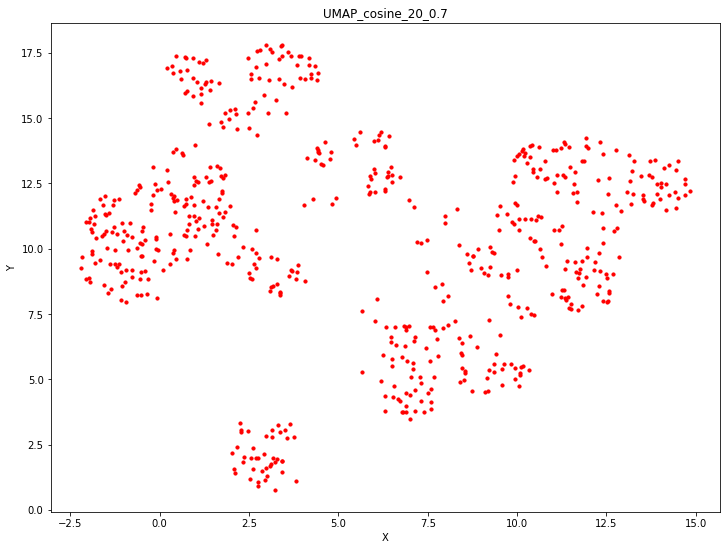

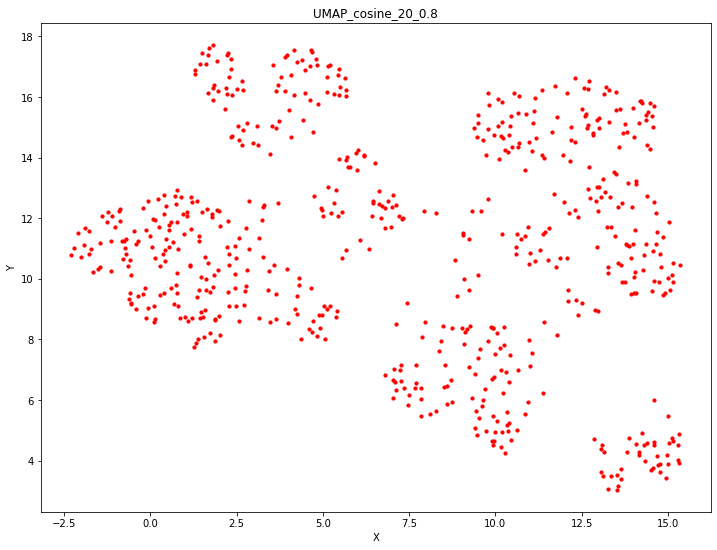

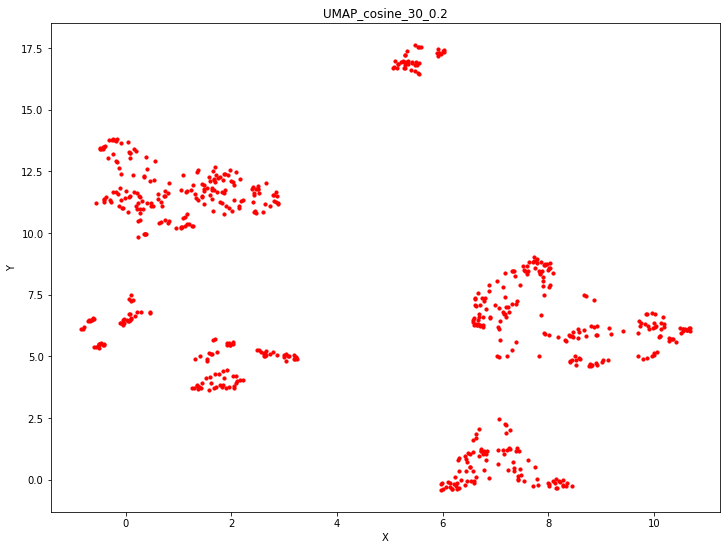

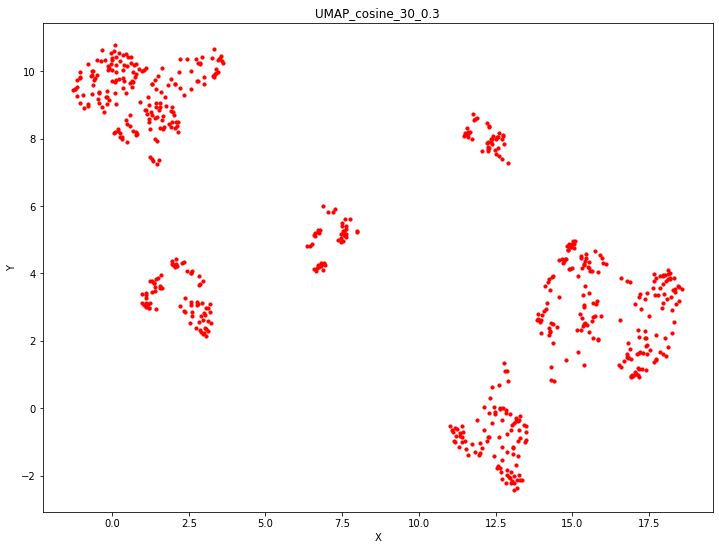

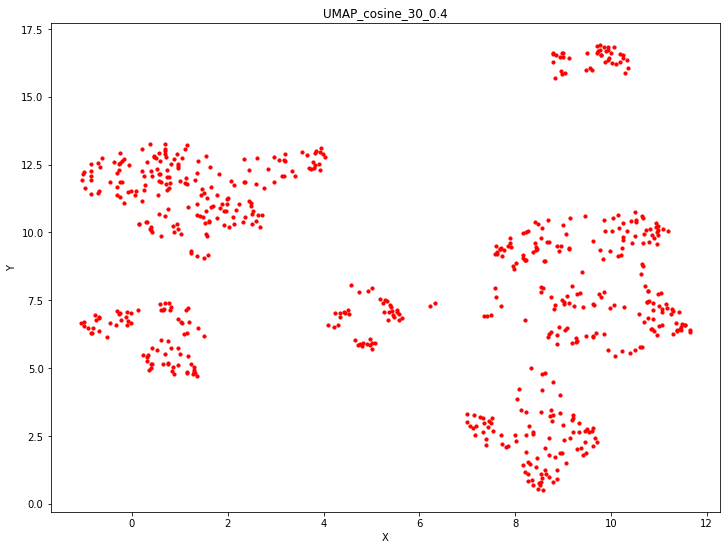

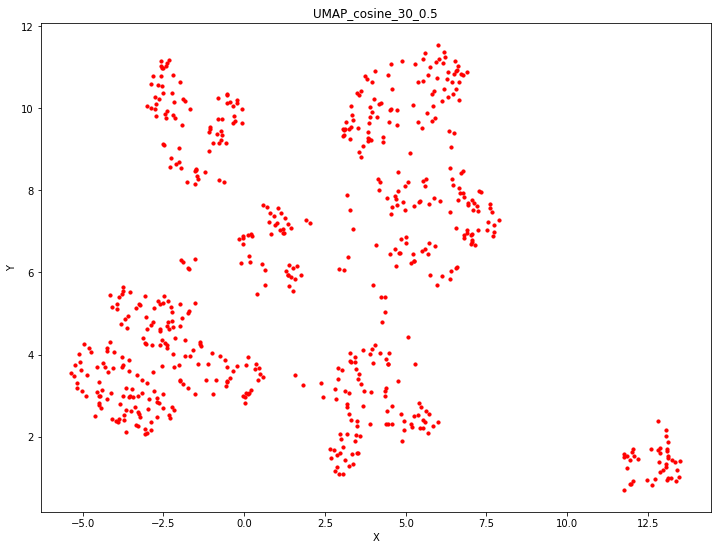

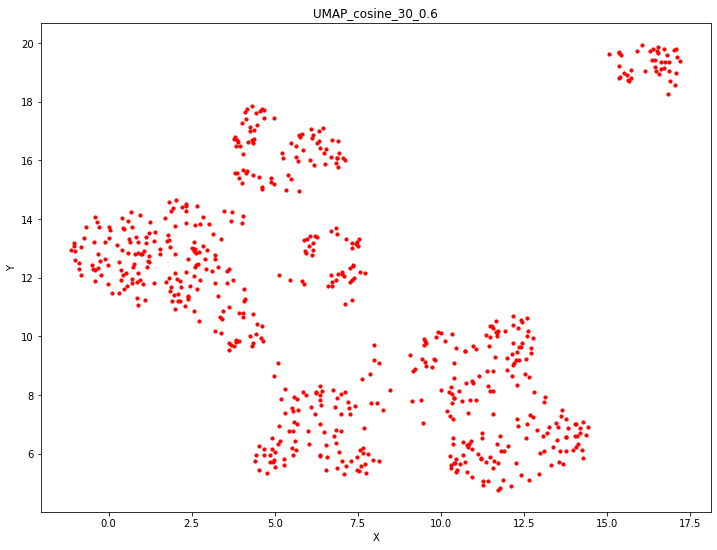

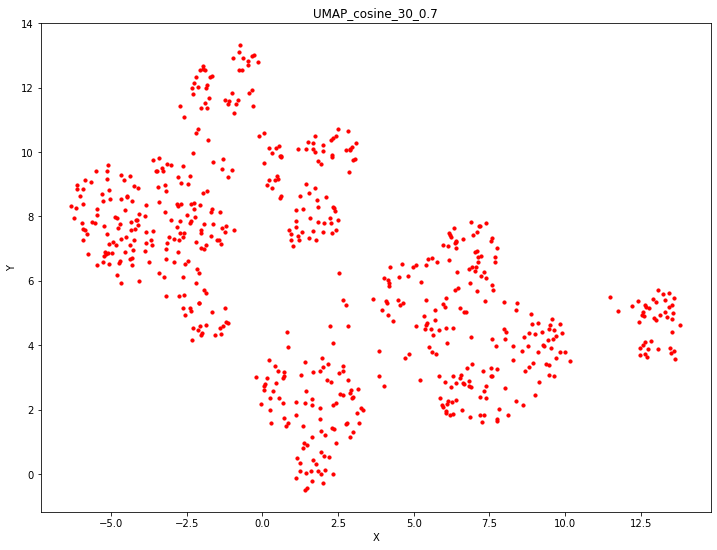

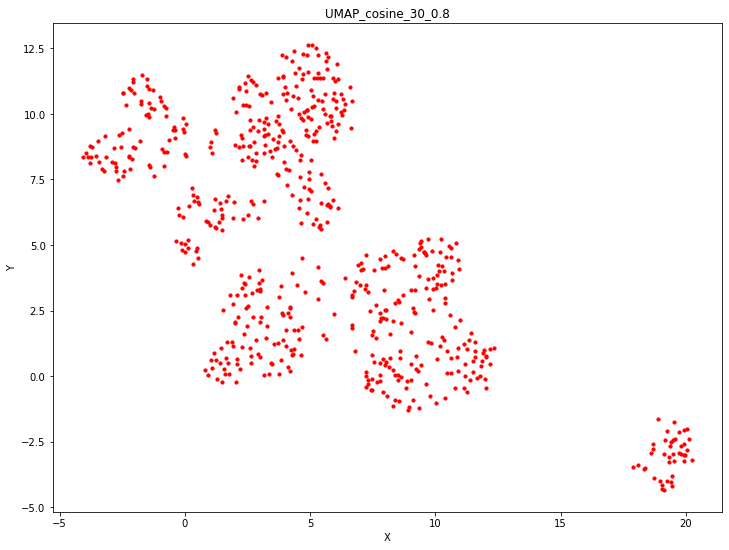

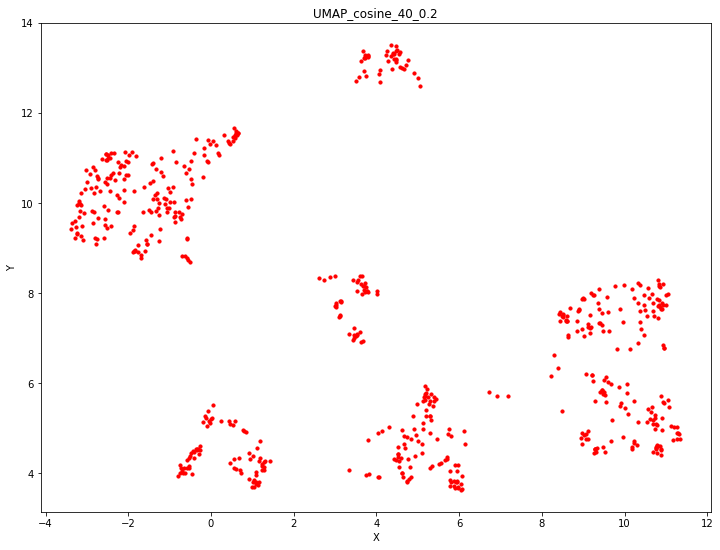

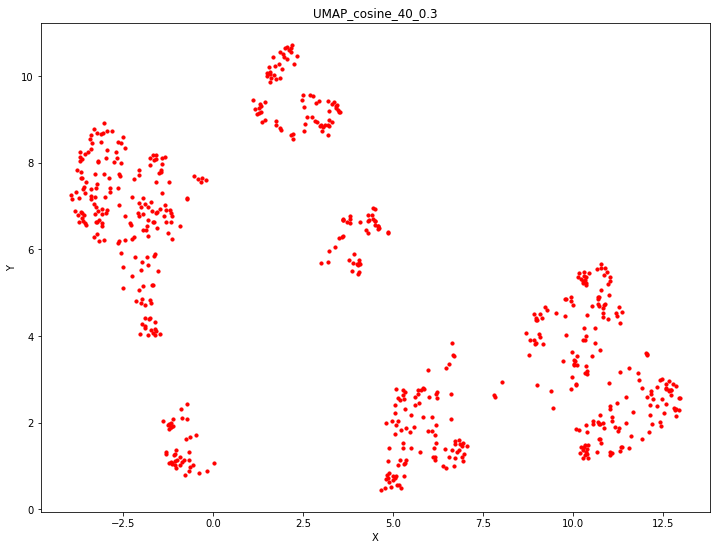

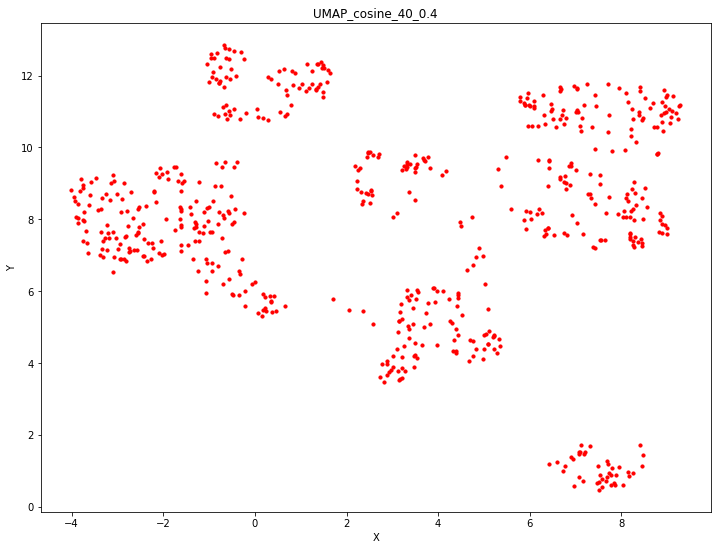

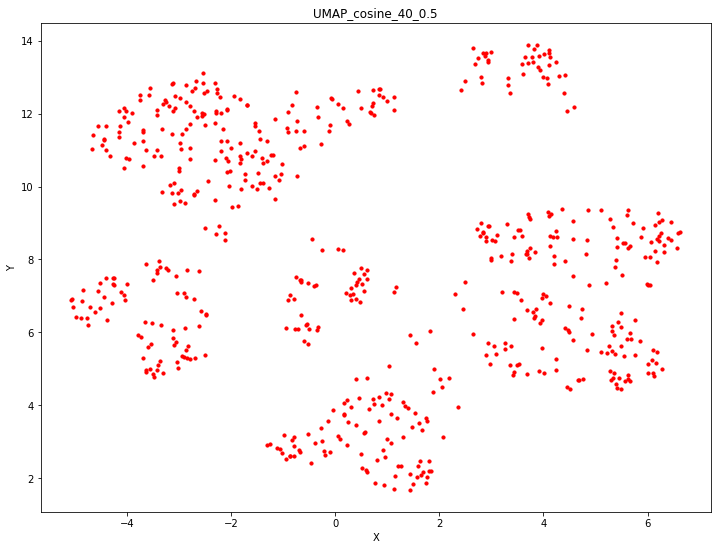

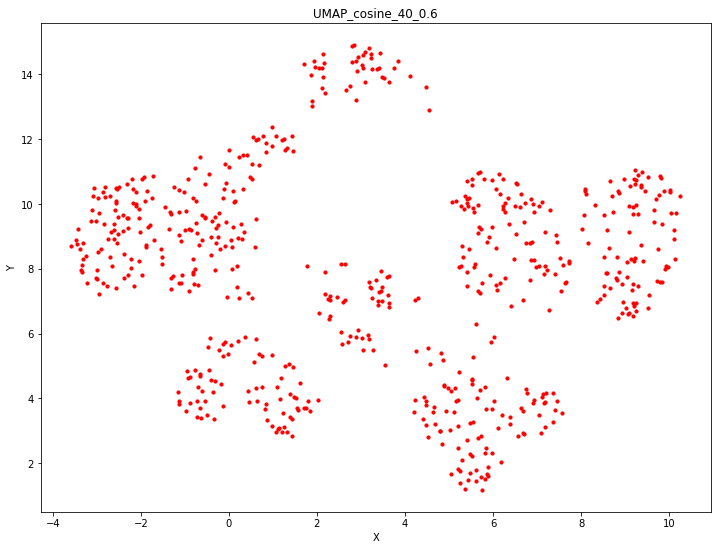

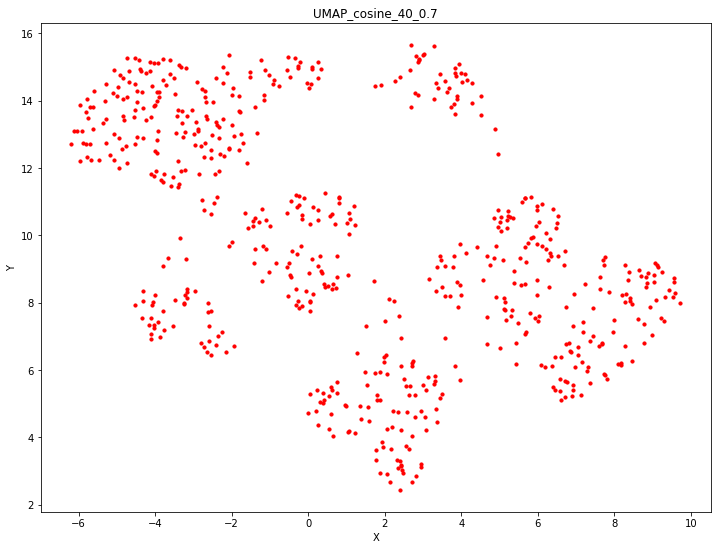

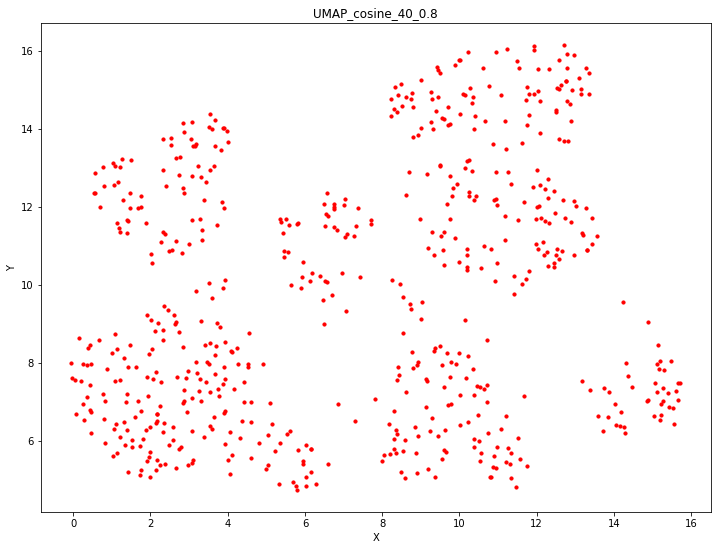

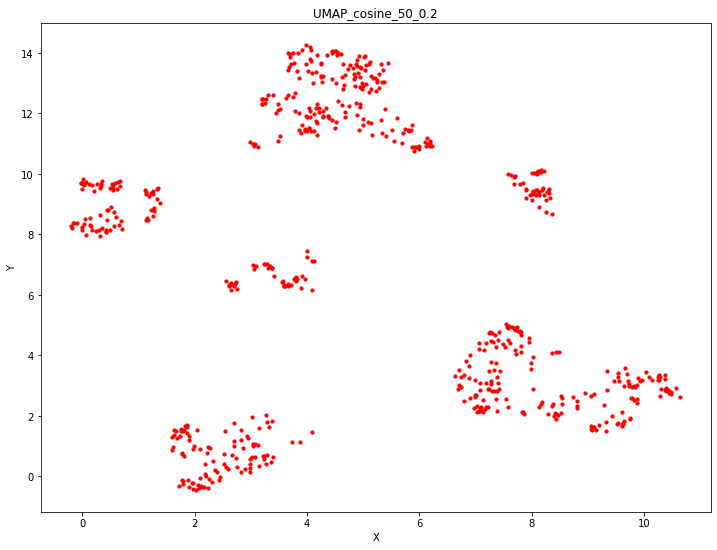

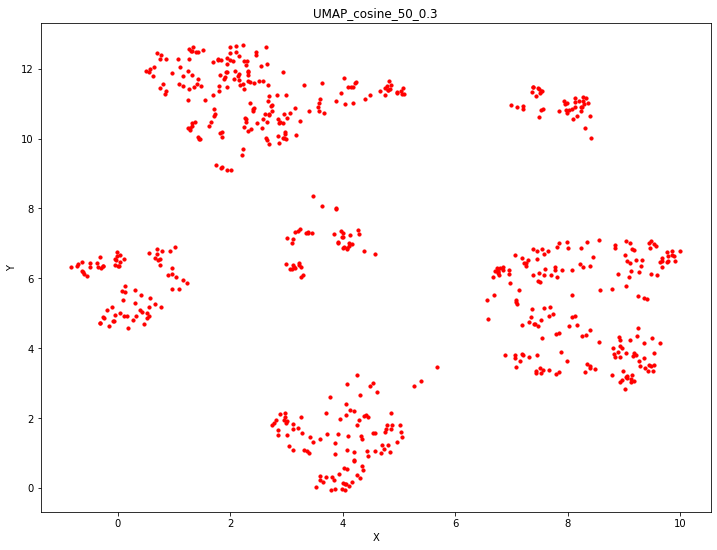

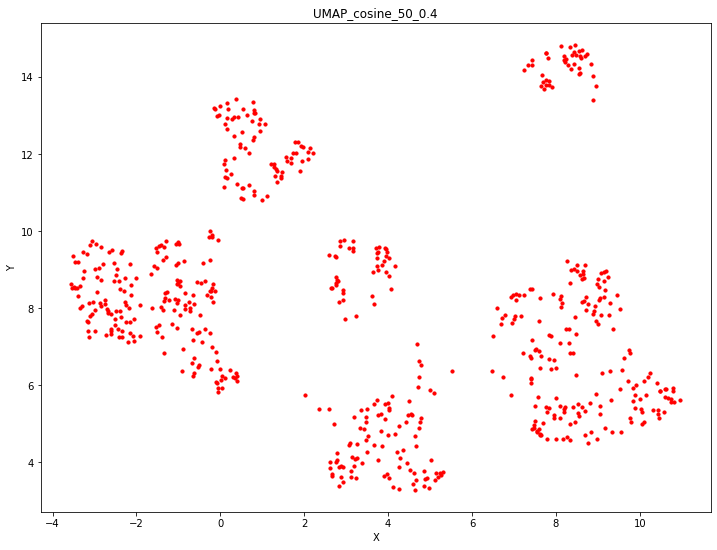

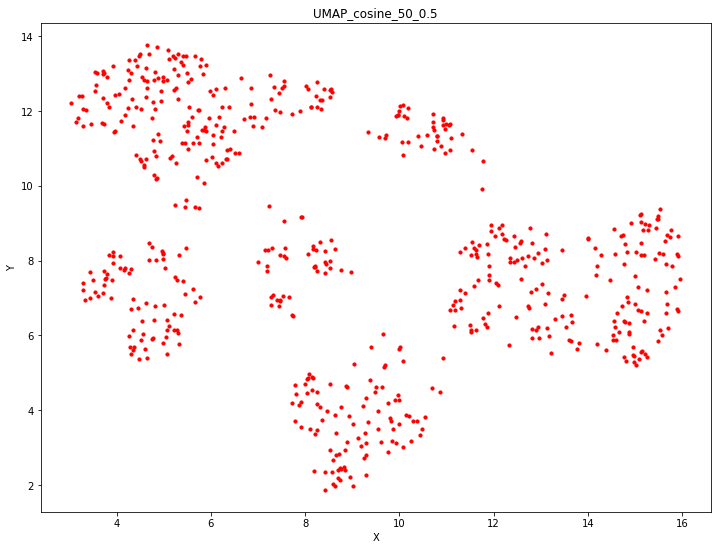

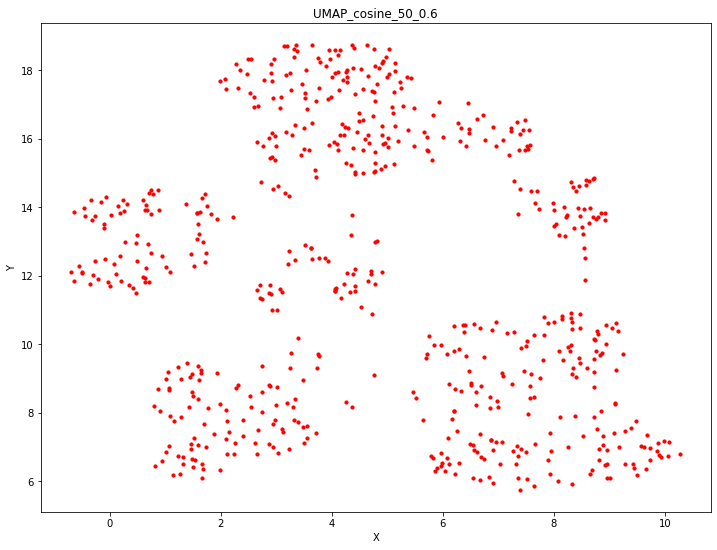

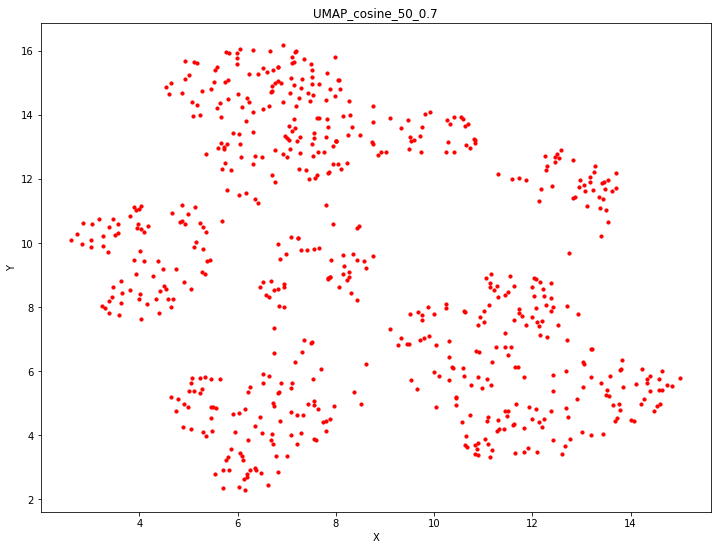

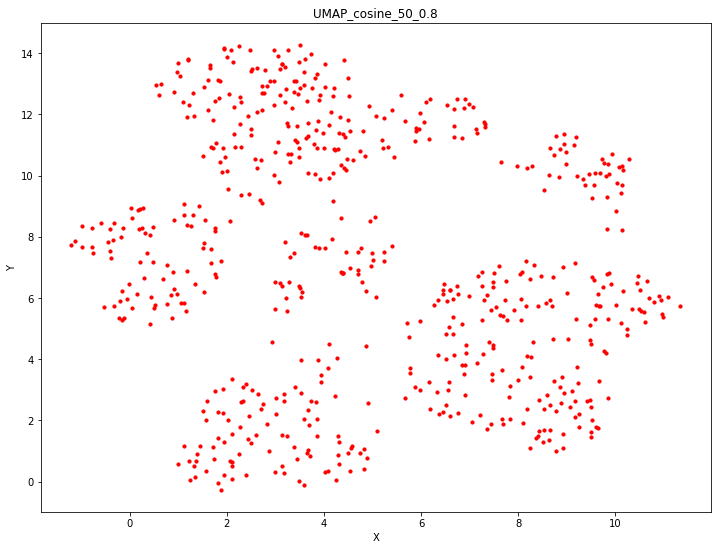

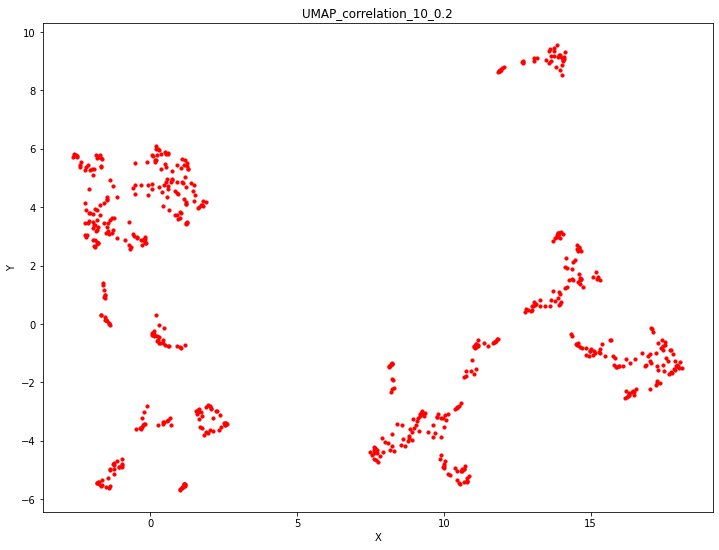

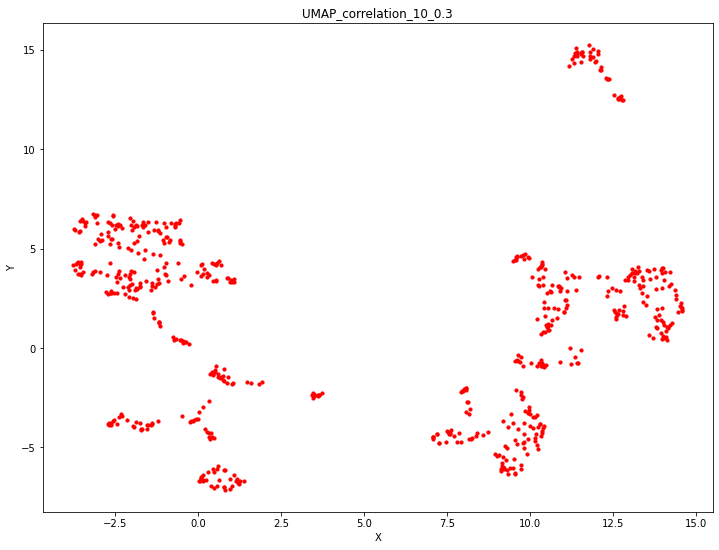

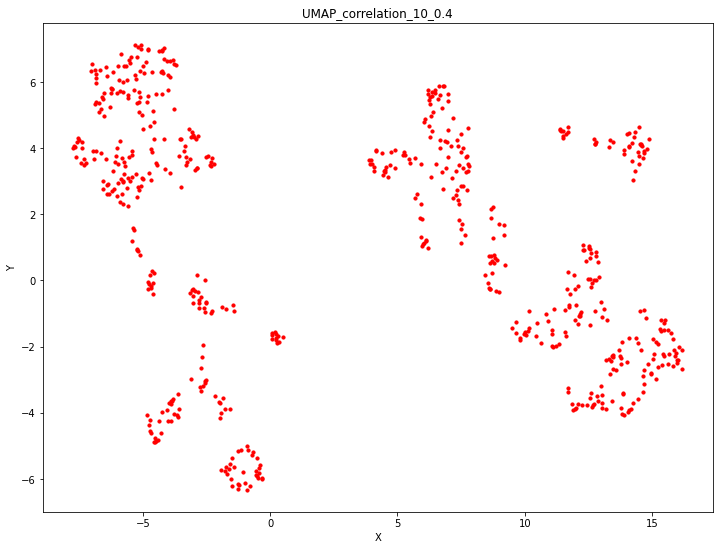

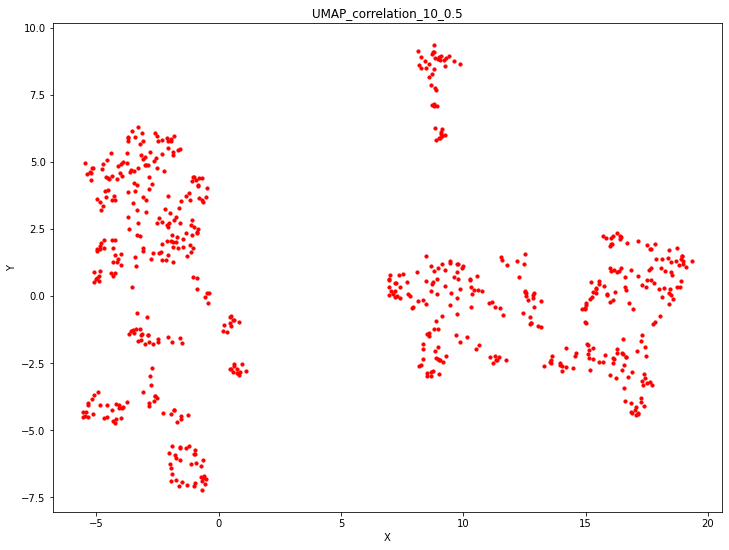

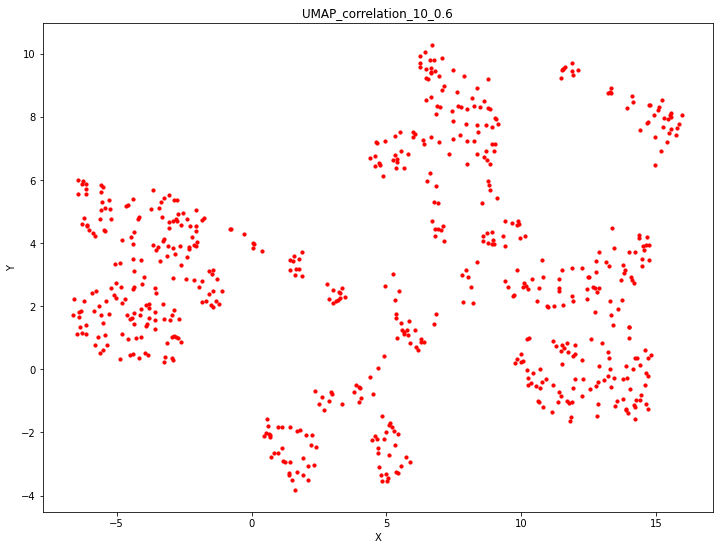

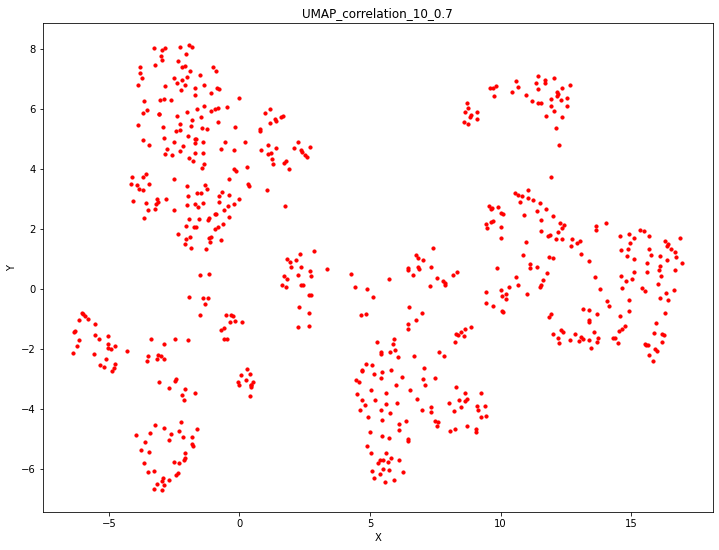

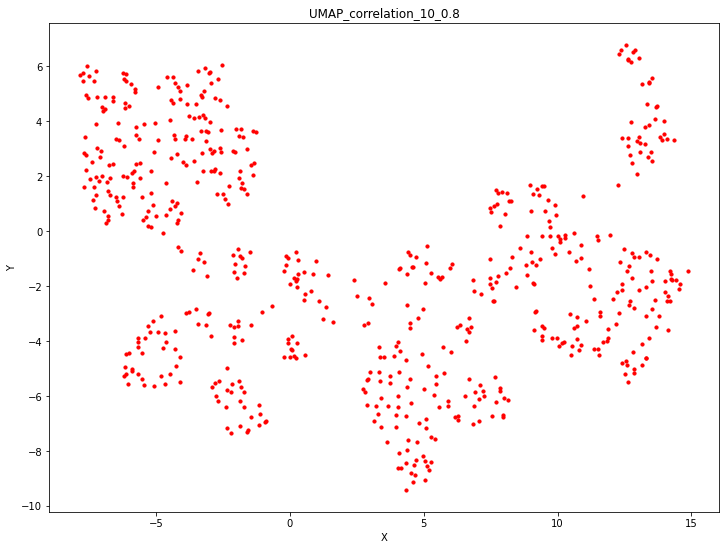

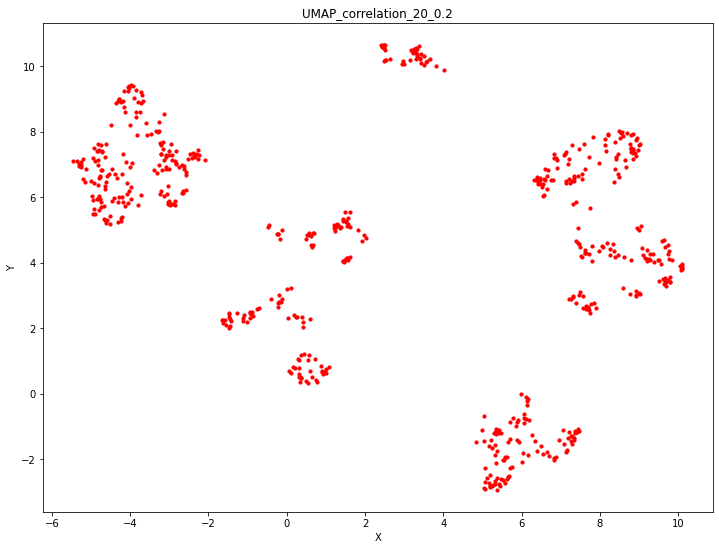

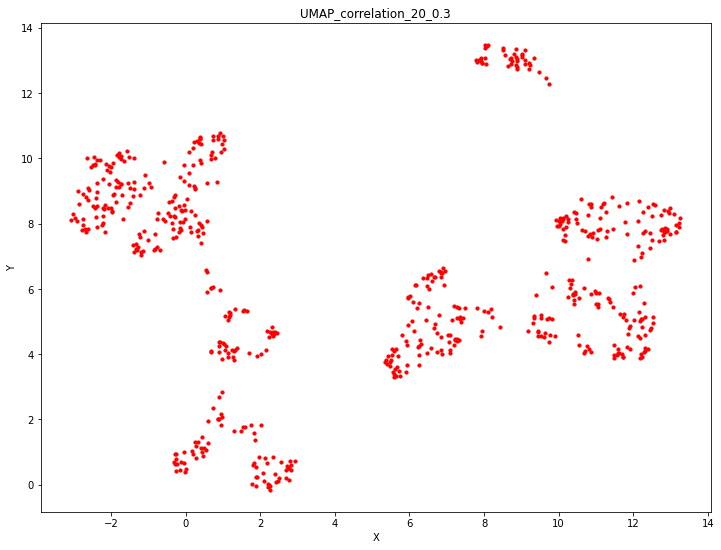

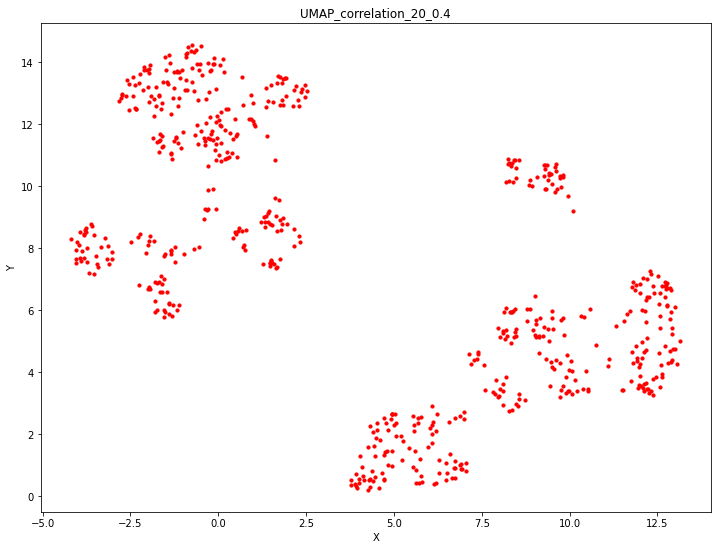

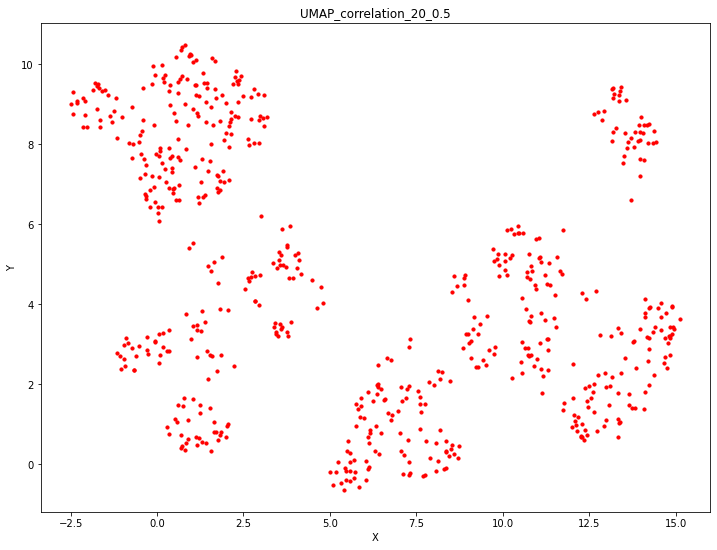

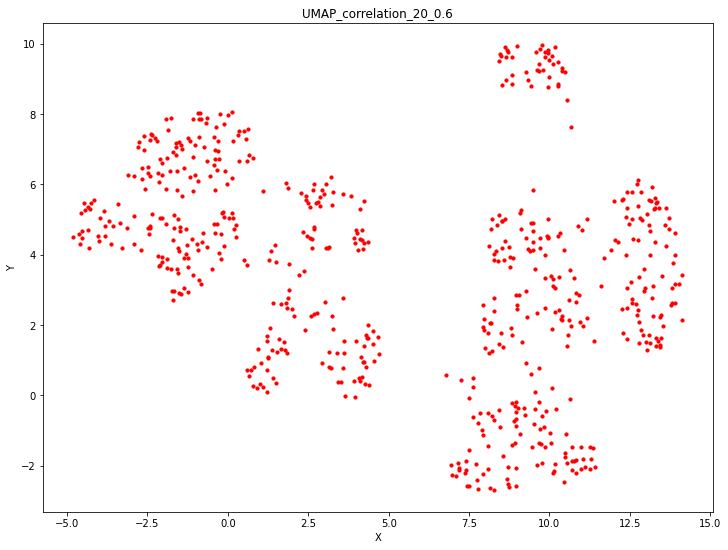

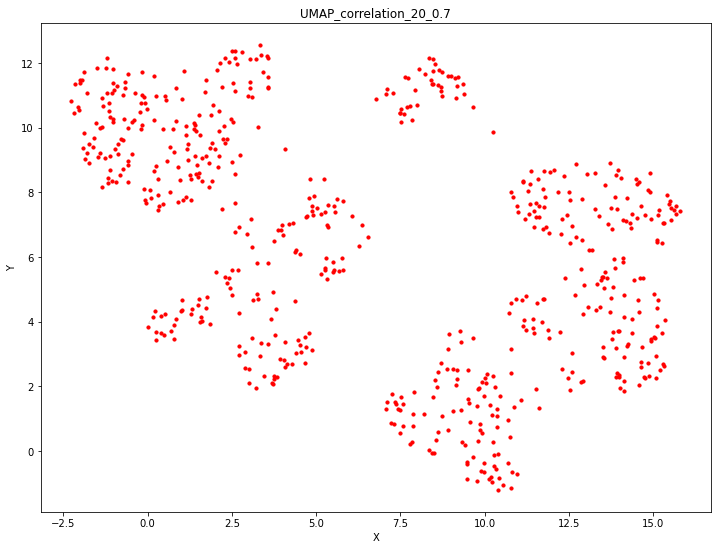

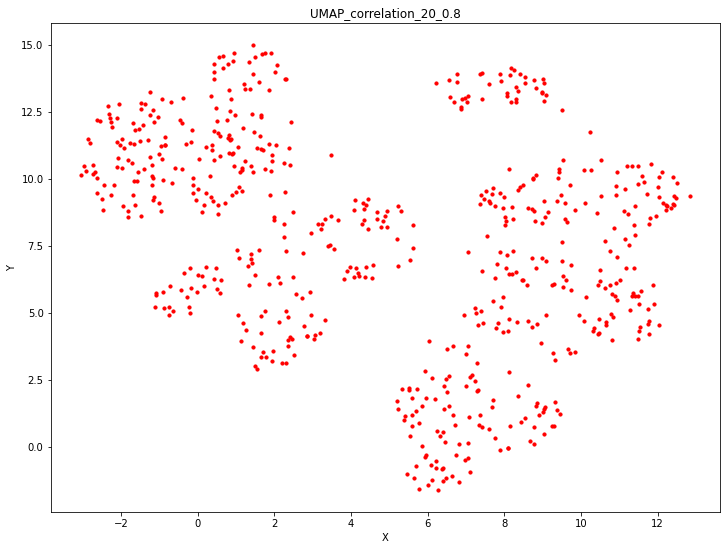

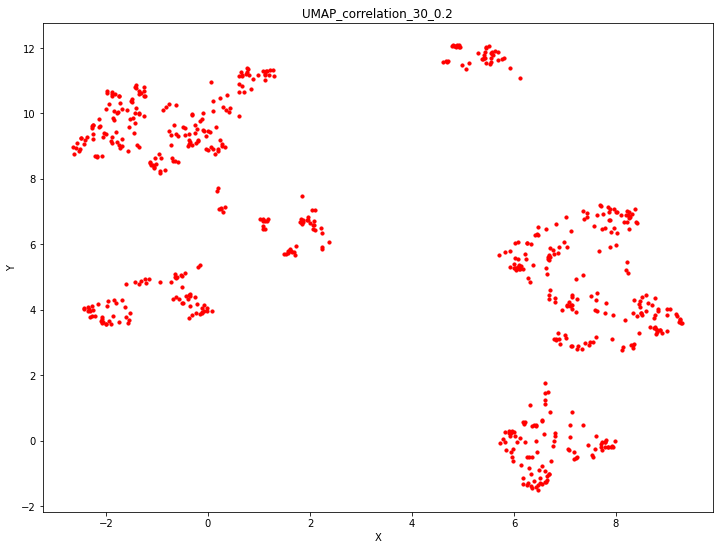

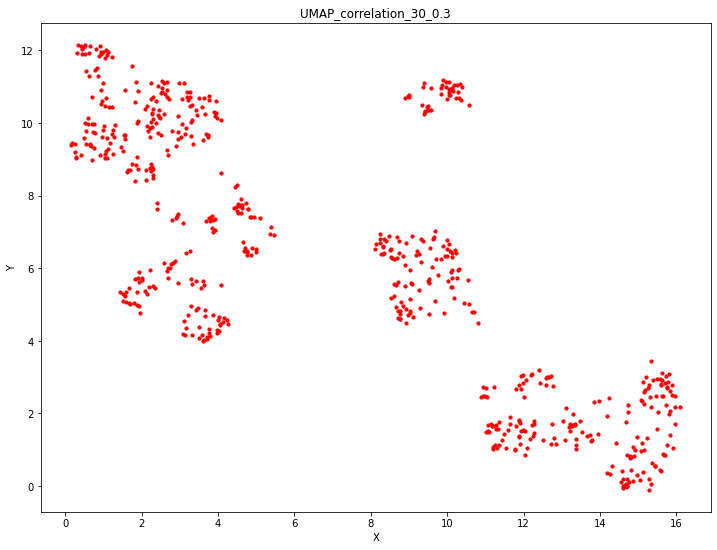

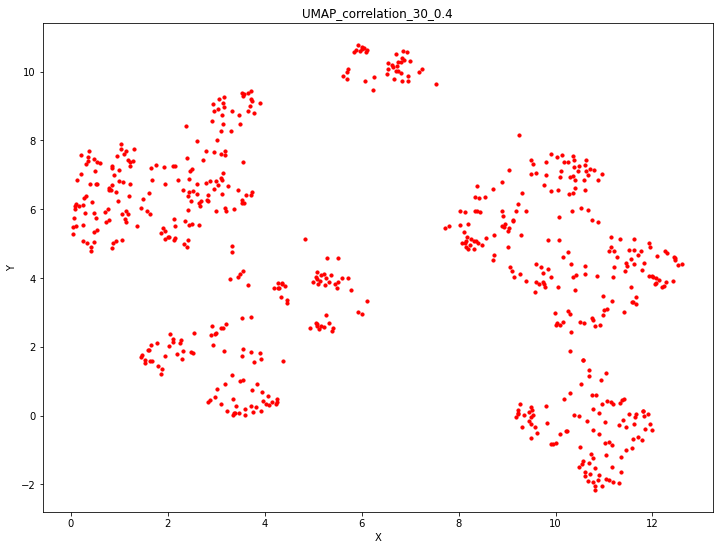

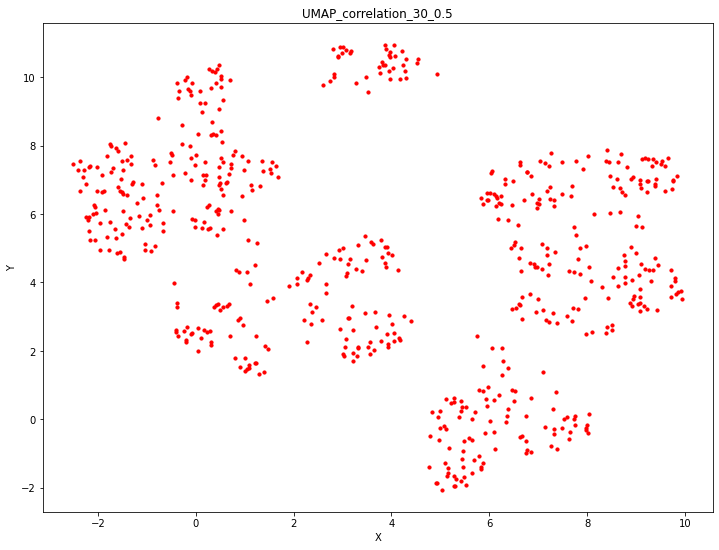

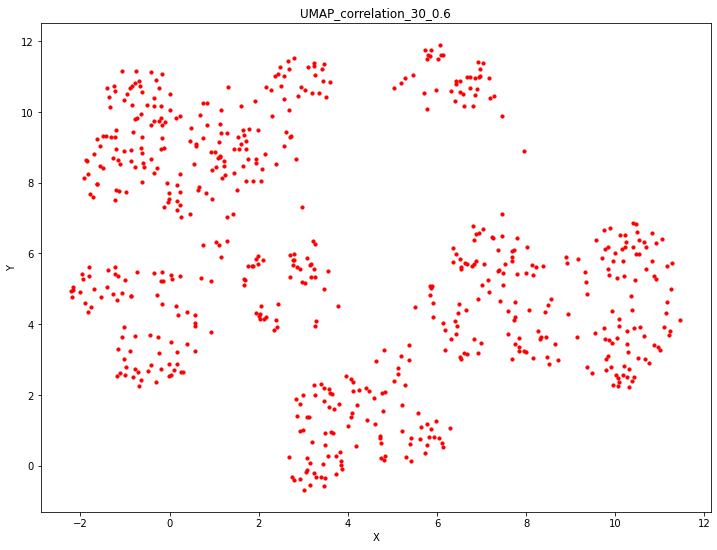

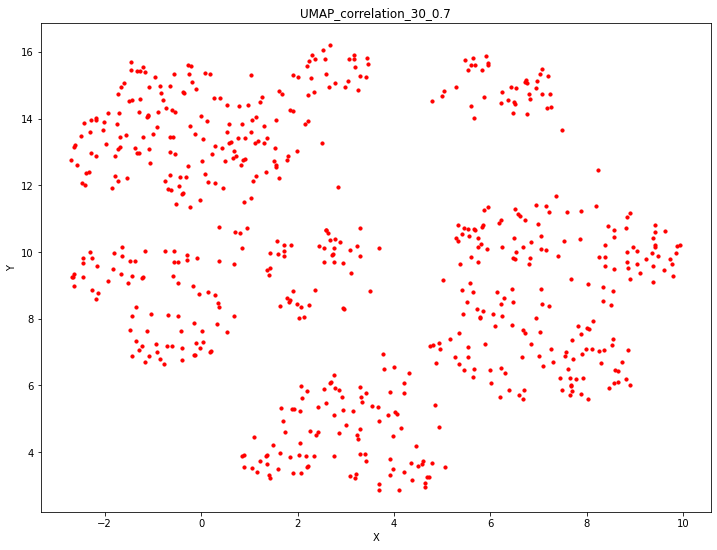

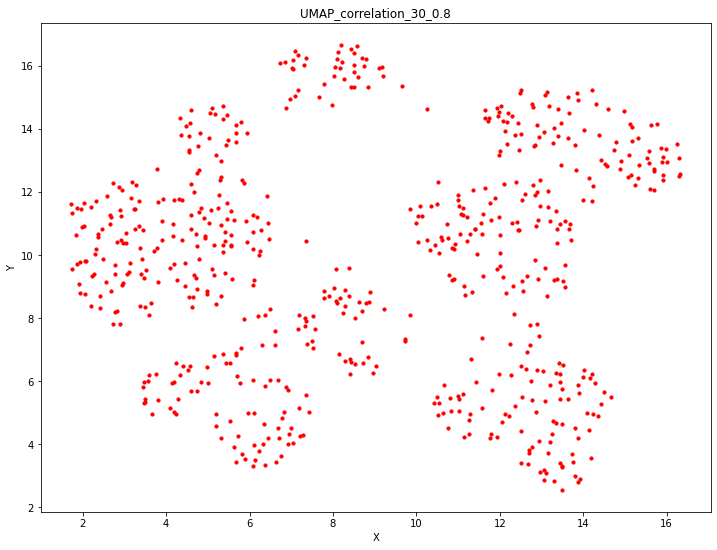

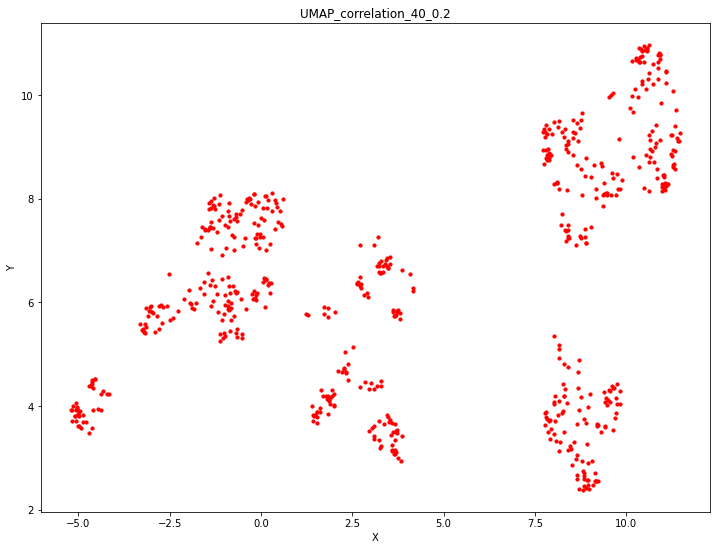

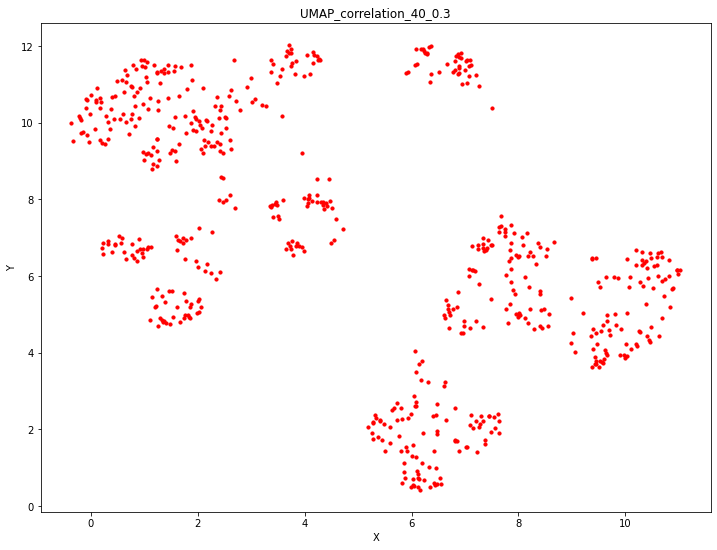

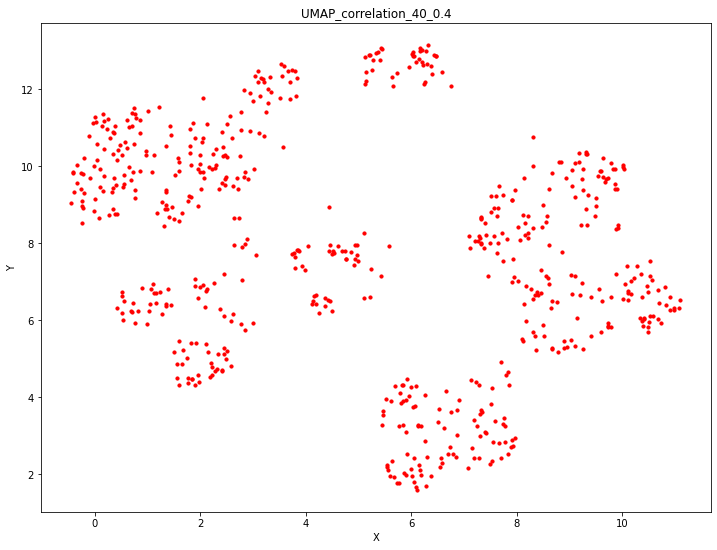

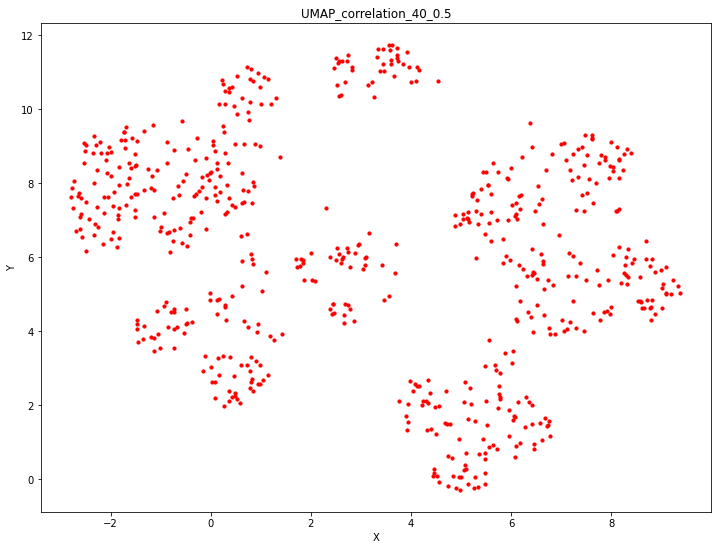

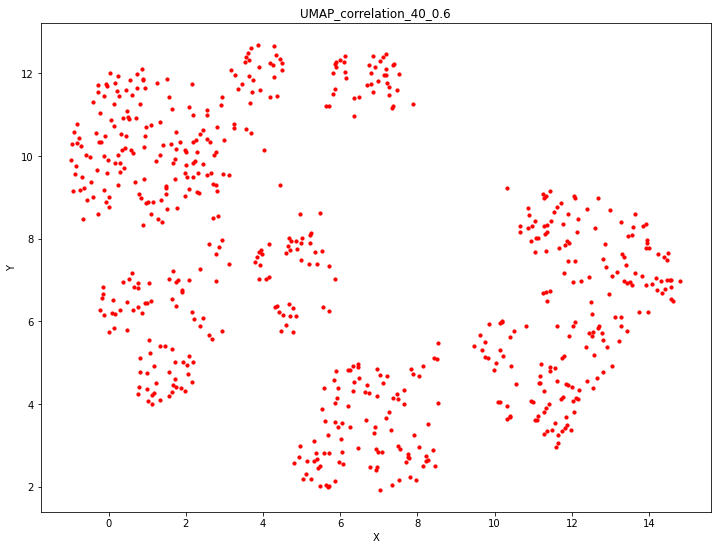

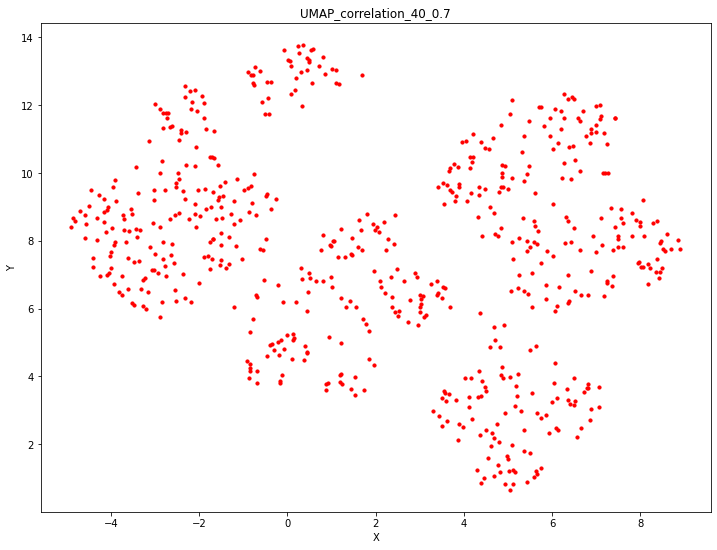

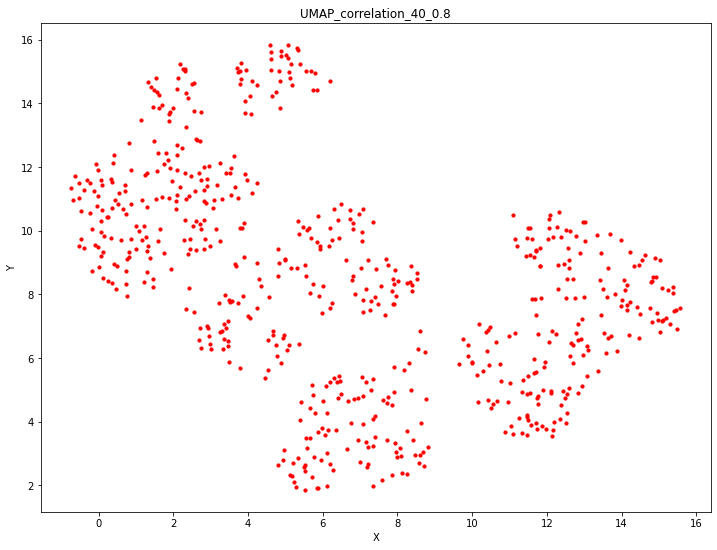

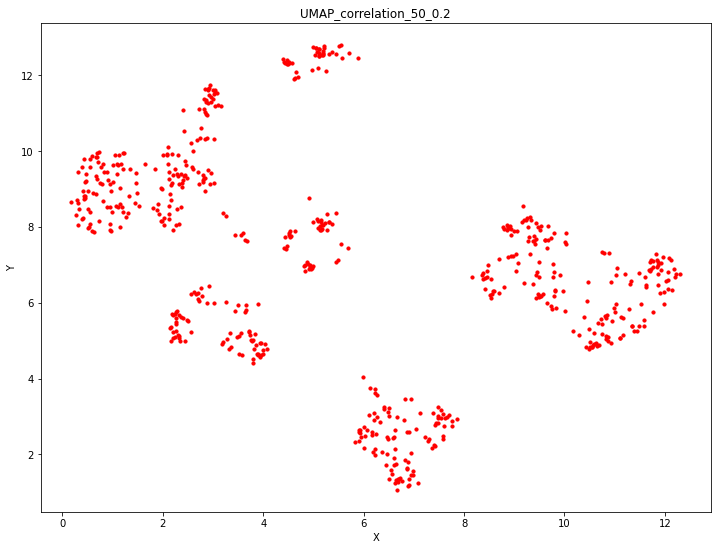

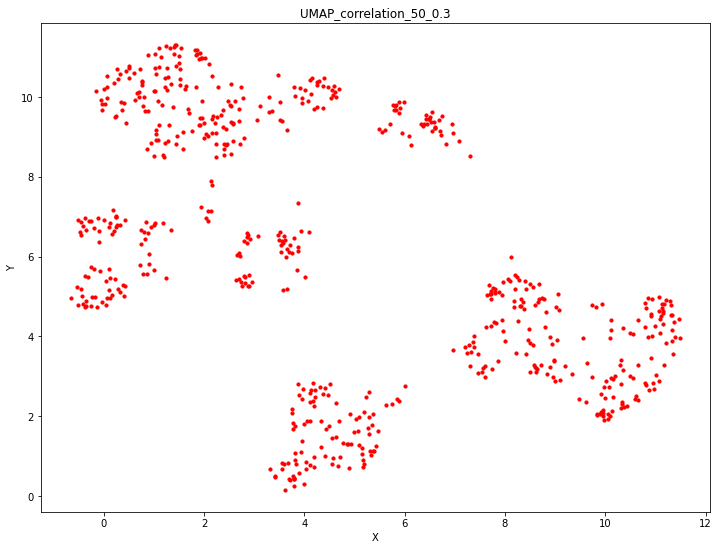

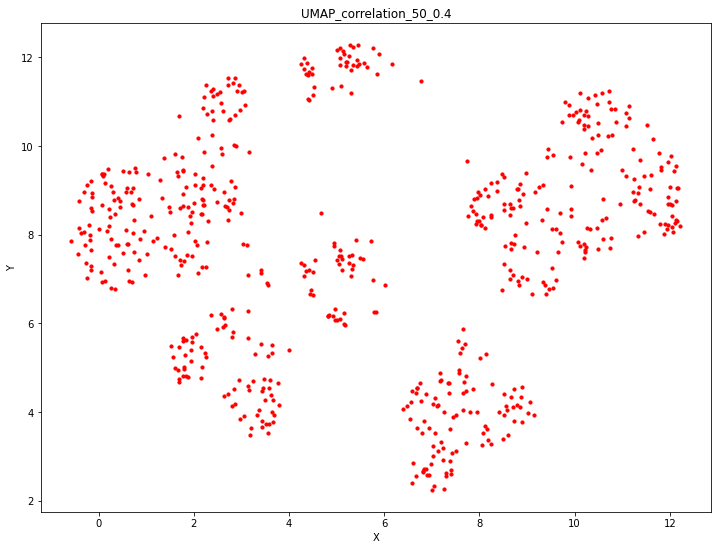

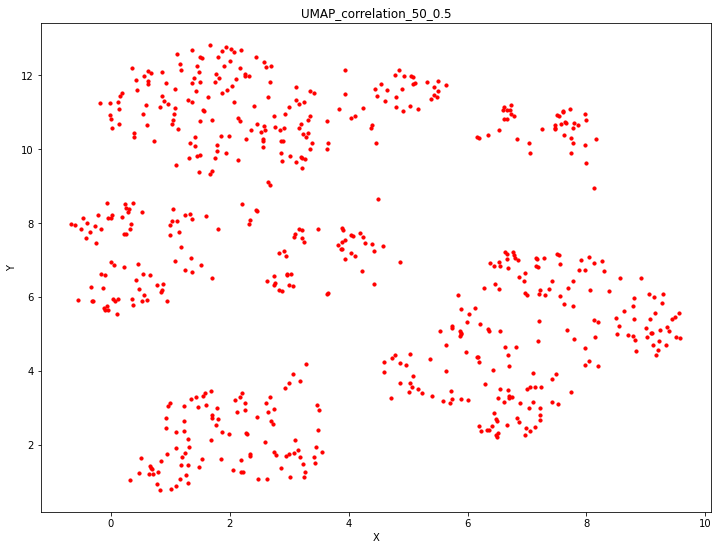

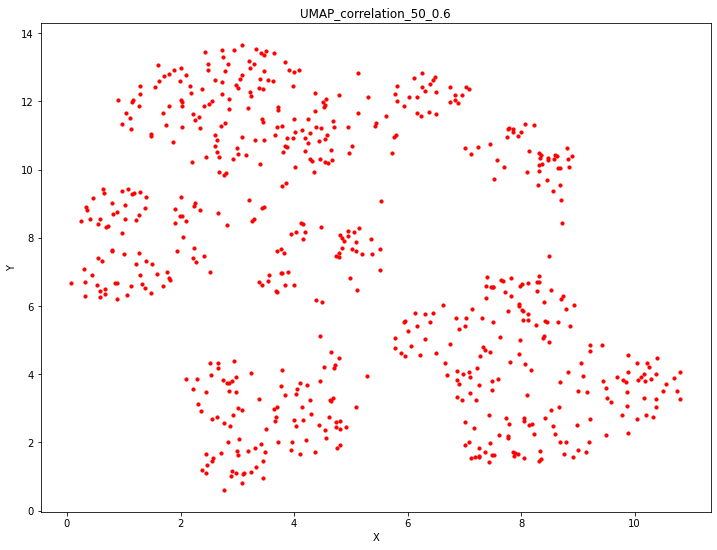

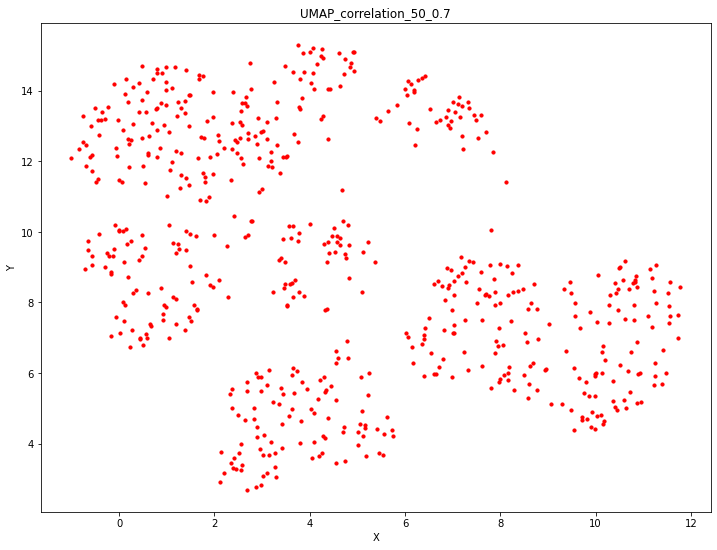

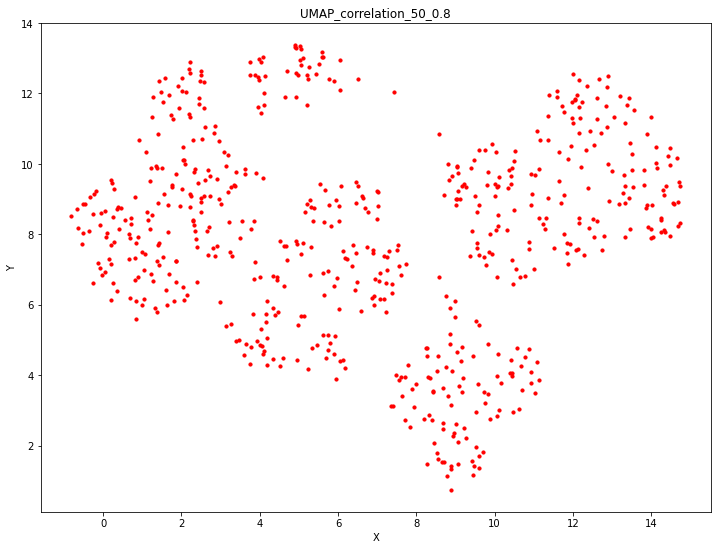

In [8]:
for metric in ['euclidean', 'cosine','correlation']:
    for n_neighbors in range(10, 60, 10):
        for min_dist in np.arange(0.2, 0.8, 0.1):
            embedding = umap.UMAP(n_components=2, n_neighbors=n_neighbors, 
                                  min_dist=min_dist, random_state=42, metric=metric)
            data_umap = embedding.fit_transform(data)
            fig = plt.figure(figsize=(12,9))
            plt.scatter(data_umap[:, 0], data_umap[:, 1], s=10, c='r')
            plt.title('UMAP_{}_{}_{}'.format(metric, str(n_neighbors), str(round(min_dist,2))))
            plt.xlabel('X')
            plt.ylabel('Y')

In [ ]:
embedding = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, random_state=42, metric='cosine')